# Real State Data Exploratory Analysis 

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
# Basics for Data Analysis 
import numpy as np
import pandas as pd
# Basics for Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

og_set = original data set

In [3]:
og_set = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data_sets/Melbourne_Housing.csv")

##  Data Sanity Check

Basic knowlege of the data frame 
1. head()
2. shape
3. info()
4. describe()

In [4]:
og_set.head() # also can use tail()

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price
0,Airport West,3,t,Nelson,03-09-2016,13.5,3042.0,3.0,2.0,1.0,303.0,225,2016.0,Western Metropolitan,3464,840000
1,Albert Park,2,h,hockingstuart,03-09-2016,3.3,3206.0,2.0,1.0,0.0,120.0,82,1900.0,Southern Metropolitan,3280,1275000
2,Albert Park,2,h,Thomson,03-09-2016,3.3,3206.0,2.0,1.0,0.0,159.0,inf,NaN,Southern Metropolitan,3280,1455000
3,Alphington,4,h,Brace,03-09-2016,6.4,3078.0,3.0,2.0,4.0,853.0,263,1930.0,Northern Metropolitan,2211,2000000
4,Alphington,3,h,Jellis,03-09-2016,6.4,3078.0,3.0,2.0,2.0,208.0,inf,2013.0,Northern Metropolitan,2211,1110000


In [5]:
og_set.shape

(27114, 16)

In [6]:
og_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27114 entries, 0 to 27113
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         27114 non-null  object 
 1   Rooms          27114 non-null  int64  
 2   Type           27114 non-null  object 
 3   SellerG        27114 non-null  object 
 4   Date           27114 non-null  object 
 5   Distance       27113 non-null  float64
 6   Postcode       27113 non-null  float64
 7   Bedroom        20678 non-null  float64
 8   Bathroom       20672 non-null  float64
 9   Car            20297 non-null  float64
 10  Landsize       17873 non-null  float64
 11  BuildingArea   10543 non-null  object 
 12  YearBuilt      11985 non-null  float64
 13  Regionname     27114 non-null  object 
 14  Propertycount  27114 non-null  int64  
 15  Price          27114 non-null  int64  
dtypes: float64(7), int64(3), object(6)
memory usage: 3.3+ MB


In [7]:
og_set.describe()

,Rooms,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,YearBuilt,Propertycount,Price
count,27114.000000,27113.000000,27113.000000,20678.000000,20672.000000,20297.000000,17873.000000,11985.000000,27114.000000,2.711400e+04
mean,2.992218,11.278737,3113.782687,3.046184,1.591525,1.715820,560.536564,1966.618273,7564.205245,1.050564e+06
std,0.954722,6.783544,111.114271,0.955024,0.701106,0.994487,1411.309127,36.042000,4493.596054,6.415785e+05
min,1.000000,0.000000,3000.000000,0.000000,0.000000,0.000000,50.000000,1850.000000,83.000000,8.500000e+04
25%,2.000000,6.400000,3046.000000,2.000000,1.000000,1.000000,220.000000,1950.000000,4294.000000,6.350000e+05
50%,3.000000,10.500000,3088.000000,3.000000,1.000000,2.000000,513.000000,1970.000000,6567.000000,8.710000e+05
75%,4.000000,14.000000,3153.000000,4.000000,2.000000,2.000000,664.000000,2000.000000,10412.000000,1.300000e+06
max,16.000000,48.100000,3978.000000,20.000000,9.000000,18.000000,76000.000000,2019.000000,21650.000000,1.120000e+07


In [8]:
# Building area should be a numeric type of value but it is as a string(object) 
type("BuildingArea")

str

In [9]:
# And if we have a date in a data set as an string(object) it is recommended to change it to a real date format 
type("Date")

str

In [10]:
og_set["Date"] = pd.to_datetime(og_set["Date"])

/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '13-05-2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '13-08-2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '14-05-2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '14-10-2017' in DD/MM/YYYY format. Provide format or specify infer_datetime

In [11]:
og_set.info() # now date is in datatime64 dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27114 entries, 0 to 27113
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         27114 non-null  object        
 1   Rooms          27114 non-null  int64         
 2   Type           27114 non-null  object        
 3   SellerG        27114 non-null  object        
 4   Date           27114 non-null  datetime64[ns]
 5   Distance       27113 non-null  float64       
 6   Postcode       27113 non-null  float64       
 7   Bedroom        20678 non-null  float64       
 8   Bathroom       20672 non-null  float64       
 9   Car            20297 non-null  float64       
 10  Landsize       17873 non-null  float64       
 11  BuildingArea   10543 non-null  object        
 12  YearBuilt      11985 non-null  float64       
 13  Regionname     27114 non-null  object        
 14  Propertycount  27114 non-null  int64         
 15  Price          2711

In [12]:
og_set["BuildingArea"].unique()

array(['225', '82', 'inf', '263', '242', '251', '117', 'missing', '76',
       '399', '118', '103', '180', '123', '218', '129', '167', '154',
       '275', '121', nan, '125', '255', '75', '156', '240', '268', '108',
       '69', '140', '214', '253', '189', '215', '96', '104', '100', '313',
       '144', '93', '110', '70', '122', '51', '147', '113', '83', '56',
       '137', '85', '64', '175', '3558', '170', '265', '353', '138', '19',
       '116', '87', '74', '320', '300', '210', '120', '86', '97', '200',
       '106', '14', '161', '128', '185', '146', '133', '115', '143',
       '150', '195', '236', '276', '188', '179', '249', '141', '34', '73',
       '107', '84', '81', '207', '50', '264', '312', '235', '221', '183',
       '132', '160', '186', '78', '105', '145', '62', '220', '315', '181',
       '61', '112', '420', '226', '266', '410', '449', '356', '477',
       '250', '95', '190', '284', '247', '213', '209', '119', '111',
       '130', '348', '166', '44', '176', '98', '159', '79'

In [13]:
# there are some strings into this particular column that change the whole dtype 
# with a quick scan you can say its "inf" and "missing"
# so what we will try to do is to change those strings into something py understands (nan)

In [14]:
# check how many are strings and how many are actually numeric values 
og_set["BuildingArea"].apply(type).value_counts()

<class 'float'>    16571
<class 'str'>      10543
Name: BuildingArea, dtype: int64

In [15]:
# using numpy replace we will change the strings inf and missing with not a number
og_set["BuildingArea"] = og_set["BuildingArea"].replace(["inf", "missing"], np.nan)
# there is other way to do oit throught importing again the data set and adding at the end
# "link to the dataset", na_values = ["missing", "inf"] 

In [16]:
# now to be able to work properly with ease we will make every entry of the column a float 
og_set["BuildingArea"] = og_set["BuildingArea"].astype(float)

In [17]:
og_set["BuildingArea"].apply(type).value_counts()

<class 'float'>    27114
Name: BuildingArea, dtype: int64

In [18]:
# to know how many nan are
og_set.isnull().sum()

Suburb               0
Rooms                0
Type                 0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom           6436
Bathroom          6442
Car               6817
Landsize          9241
BuildingArea     16585
YearBuilt        15129
Regionname           0
Propertycount        0
Price                0
dtype: int64

In [19]:
# as you can see distance to yearbuildt 
#8 columns 

In [20]:
# to know if theres dupliates 
og_set.duplicated().sum()

11

In [21]:
# lets remove those duplicates 
og_set.drop_duplicates(inplace=True)
# this last line of code ruins the index so lets fix the index 
og_set.reset_index(drop=True, inplace=True)

In [22]:
# now we dont have duplicates
og_set.duplicated().sum()

0

In [23]:
og_set.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,27103.0,2.992473e+00,0.954667,1.0,2.0,3.0,4.0,16.0
Distance,27102.0,1.127993e+01,6.783958,0.0,6.4,10.5,14.0,48.1
Postcode,27102.0,3.113787e+03,111.129025,3000.0,3046.0,3088.0,3153.0,3978.0
Bedroom,20678.0,3.046184e+00,0.955024,0.0,2.0,3.0,4.0,20.0
Bathroom,20672.0,1.591525e+00,0.701106,0.0,1.0,1.0,2.0,9.0
Car,20297.0,1.715820e+00,0.994487,0.0,1.0,2.0,2.0,18.0
Landsize,17873.0,5.605366e+02,1411.309127,50.0,220.0,513.0,664.0,76000.0
BuildingArea,10529.0,1.545119e+02,130.583872,11.0,101.0,133.0,183.0,6791.0
YearBuilt,11985.0,1.966618e+03,36.042000,1850.0,1950.0,1970.0,2000.0,2019.0
Propertycount,27103.0,7.564741e+03,4494.028347,83.0,4294.0,6567.0,10412.0,21650.0


In [24]:
#postcode it apears a number even though we know it should be more a string so lets see 
# the total number of unique values in the postcode column 
og_set["Postcode"].nunique() 
# unique gives you all 
# nunique the number of unique values

209

In [25]:
# lets see the number of categorical variables 
# this is a really useful code
categorical_columns = ["Suburb", "Type", "SellerG", "Regionname"]
for i in categorical_columns:
    print(og_set[i].value_counts())
    print("-" * 50)

Reservoir         724
Bentleigh East    493
Richmond          437
Preston           410
Brunswick         383
                 ... 
Wandin North        1
Ferny Creek         1
Tecoma              1
Montrose            1
viewbank            1
Name: Suburb, Length: 345, dtype: int64
--------------------------------------------------
h    18394
u     5882
t     2827
Name: Type, dtype: int64
--------------------------------------------------
Nelson           2733
Jellis           2516
Barry            2385
hockingstuart    2096
Ray              1574
                 ... 
Allan               1
Jim                 1
iProperty           1
Batty               1
Icon                1
Name: SellerG, Length: 347, dtype: int64
--------------------------------------------------
Southern Metropolitan         8480
Northern Metropolitan         7809
Western Metropolitan          5792
Eastern Metropolitan          3264
South-Eastern Metropolitan    1336
Northern Victoria              165
Eastern Victor

In [26]:
# lets see it but in percentage 
for i in categorical_columns:
    print(og_set[i].value_counts(normalize = True))
    print("-" * 50)

Reservoir         0.026713
Bentleigh East    0.018190
Richmond          0.016124
Preston           0.015127
Brunswick         0.014131
                    ...   
Wandin North      0.000037
Ferny Creek       0.000037
Tecoma            0.000037
Montrose          0.000037
viewbank          0.000037
Name: Suburb, Length: 345, dtype: float64
--------------------------------------------------
h    0.678670
u    0.217024
t    0.104306
Name: Type, dtype: float64
--------------------------------------------------
Nelson           0.100838
Jellis           0.092831
Barry            0.087998
hockingstuart    0.077335
Ray              0.058075
                   ...   
Allan            0.000037
Jim              0.000037
iProperty        0.000037
Batty            0.000037
Icon             0.000037
Name: SellerG, Length: 347, dtype: float64
--------------------------------------------------
Southern Metropolitan         0.312880
Northern Metropolitan         0.288123
Western Metropolitan          0.

### Analysis post sanity check of the data set 


### **Preliminary** Results

*   The ds had some issues with strings making a whole column an object dtype so I changed that, remove any kind of string and replacing them with nan 
*   The date was not in datetime64 dtype so it had to be done manually 
*   There are probably outliers because some of the max values in the columns rooms, bedrooms, bathroom and cars
*  Reservoir is the suburn with more entrys, h the type of house more common, Nelson the guy with more sells and the southern metropolitan is the region with more houses in this particular dataset









## Univariate Analysis 

### Distance

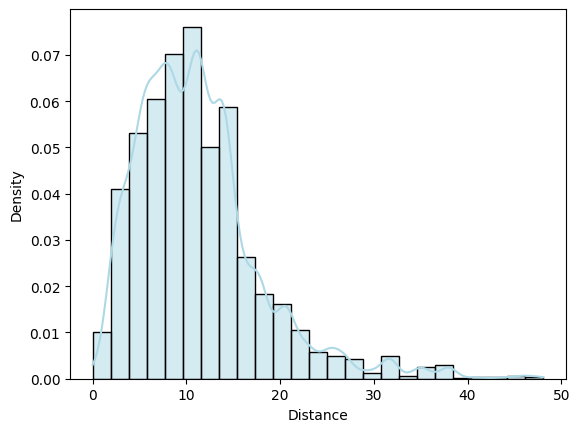

In [27]:
sns.histplot(data = og_set, x = "Distance", stat = "density", bins = 25, kde = True, color = "lightblue");

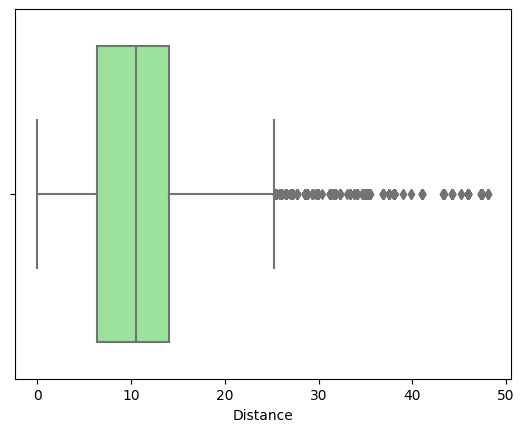

In [28]:
sns.boxplot(data = og_set, x = "Distance", color = "lightgreen");
# a lot of outliers 


*   Skewed towards right 
*   Many outliers 
*   If distance is gretear than 25 km is an outlier



In [29]:
# how many outliers are 
og_set.loc[og_set["Distance"]>25].shape
# a lot

(1206, 16)

### Landsize

It is in sqmeters so to make it easear I will divide them by a million sqmeters so that will give me a sqkilometer scale

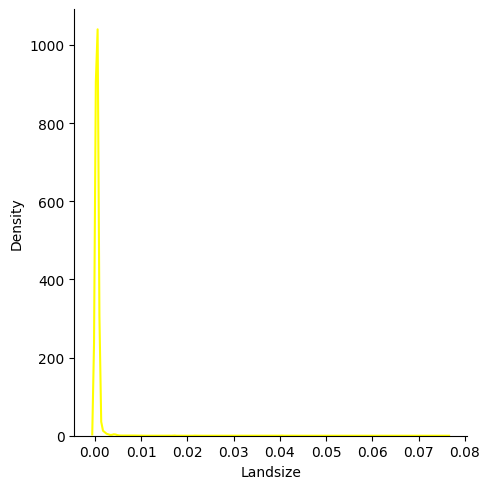

In [30]:
sns.displot(data = og_set, x = og_set["Landsize"]/1000000, kind = "kde", color = "yellow");

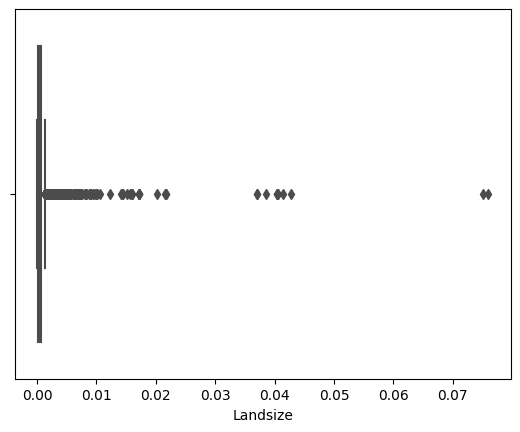

In [31]:
sns.boxplot(data = og_set, x = og_set["Landsize"]/1000000, color = "blue");



*   Highly skewed to right 
*   Many outliers 



In [32]:
# To see wich rows have a ls greater than 0.01 skm
og_set.loc[og_set["Landsize"]>60000]

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price
23897,Silvan,3,h,Harcourts,2017-05-27,34.6,3795.0,3.0,2.0,2.0,76000.0,NaN,NaN,Eastern Victoria,457,1085000
25079,Balwyn North,3,h,Kay,2016-08-28,9.2,3104.0,3.0,1.0,2.0,75100.0,NaN,NaN,Southern Metropolitan,7809,2000000


### Building Area

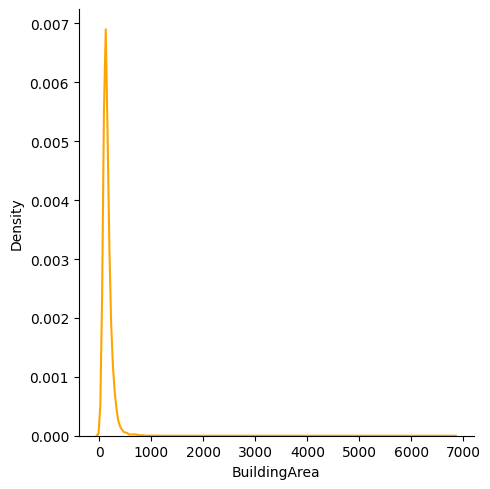

In [33]:
sns.displot(data = og_set, x = og_set["BuildingArea"], kind = "kde", color = "orange");

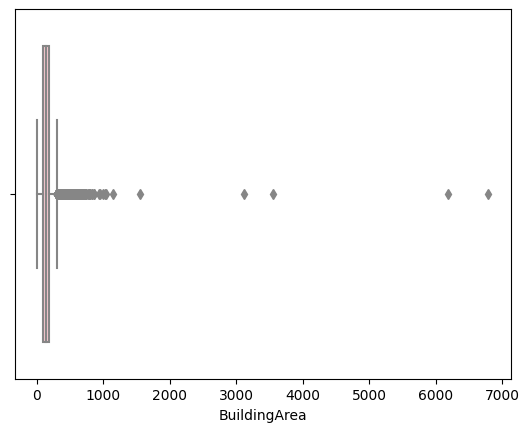

In [34]:
sns.boxplot(data = og_set, x = og_set["BuildingArea"], color = "pink");



*   Also skewed towards right
*   It has many outliers but after 2k there are a few ones that I may have to check out in detail later 



### Price

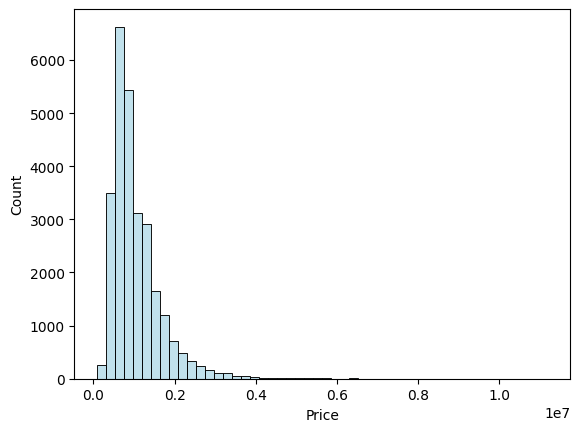

In [35]:
sns.histplot(data = og_set, x = og_set["Price"], bins = 50, color = "lightblue");

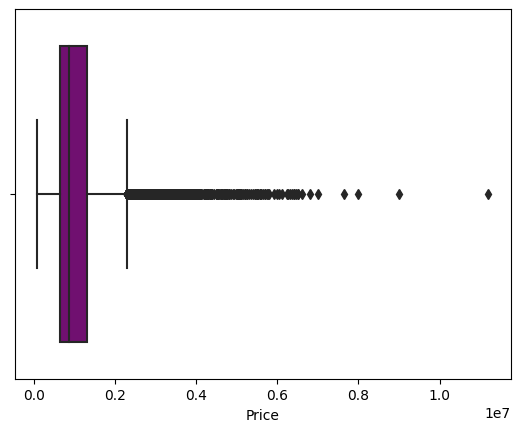

In [36]:
sns.boxplot(data = og_set, x = "Price", color = "purple");



*  Skewed right
*  outliers greater than 7 Million will need more analysis 



### Rooms 

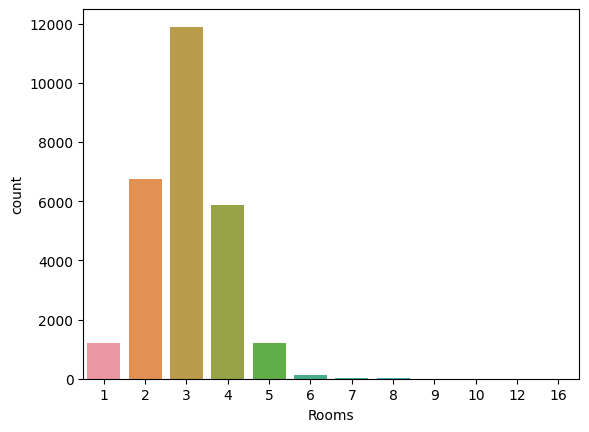

In [37]:
sns.countplot( data = og_set, x ="Rooms");

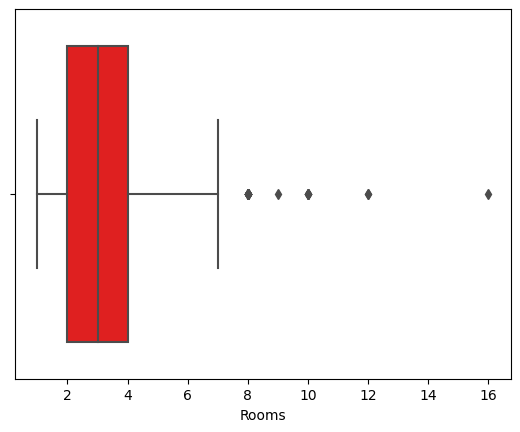

In [38]:
sns.boxplot(data = og_set, x = "Rooms", color = "red");

In [39]:
# how many houses has more than seven rooms 
og_set.loc[og_set["Rooms"]>7].shape

(23, 16)

In [40]:
# what type are the properties 
og_set.loc[og_set["Rooms"]>7, "Type"].value_counts() # if you use normalize = True it will be in %

h    21
u     2
Name: Type, dtype: int64



*  Skewed right but the most normal distibution in the whole data frame
*  Its pretty rare to see a house with more than 7 rooms and for that instance there are not as many outliers as in Distance for example



### Region Name

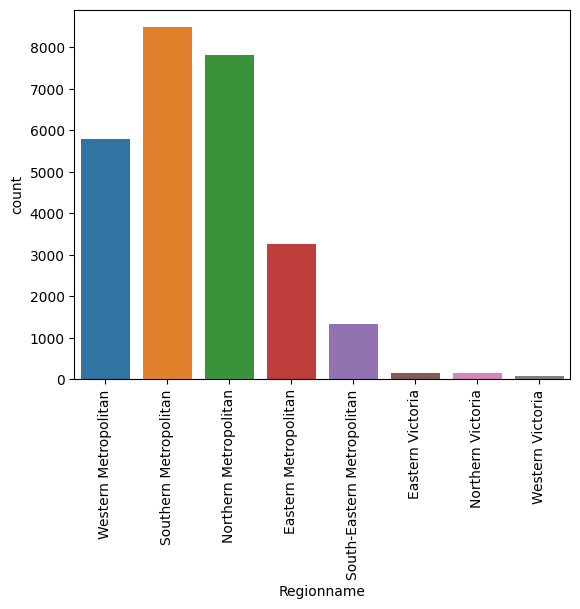

In [41]:
sns.countplot(data = og_set, x = "Regionname" );
plt.xticks(rotation = 90);

## Bivariate Analysis 

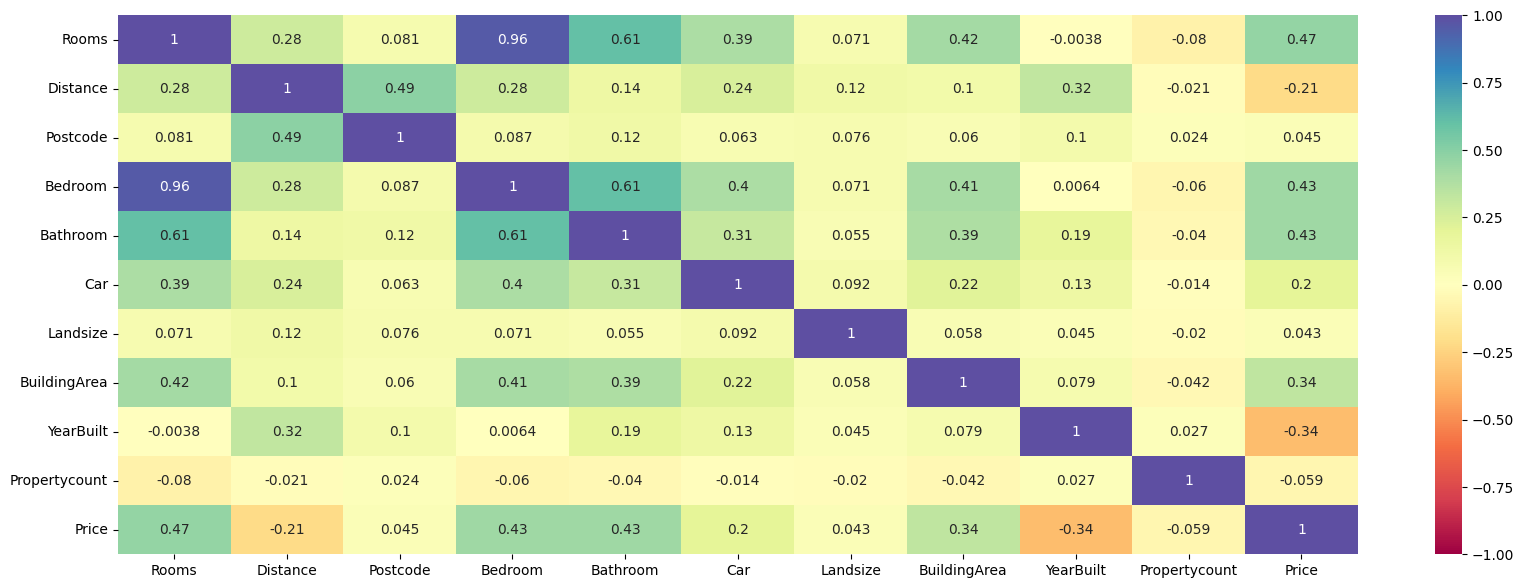

In [42]:
# we will do a heatmap with corr() method to get the cor_matrix
plt.figure(figsize = (20,7))
sns.heatmap(og_set.corr(), annot = True, cmap = "Spectral", vmin = -1, vmax = 1);

In [43]:
# it doesnt have any sense to make any analysis with postcode so any kind of cor with that column will be ignore



*   -0.34 cor between year of built and the price , so older homes usually are more expensive
*   Building area and the price has a 0.34 cor that is very intuitive information as well as the cor in rooms and price that is one of the highest 0.47
* And others with not that useful information such as the cor between bathrooms to bedrooms or rooms of 0.61 



In [44]:
# I will create a new column that will include all the spaces of the house as rooms, bathrooms, bedrooms and car spaces 
# to see the relation between the total spaces with the price
og_set["Total_spaces"] = og_set["Car"] + og_set["Rooms"] + og_set["Bedroom"] + og_set["Bathroom"]
og_set.head() 

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,Total_spaces
0,Airport West,3,t,Nelson,2016-03-09,13.5,3042.0,3.0,2.0,1.0,303.0,225.0,2016.0,Western Metropolitan,3464,840000,9.0
1,Albert Park,2,h,hockingstuart,2016-03-09,3.3,3206.0,2.0,1.0,0.0,120.0,82.0,1900.0,Southern Metropolitan,3280,1275000,5.0
2,Albert Park,2,h,Thomson,2016-03-09,3.3,3206.0,2.0,1.0,0.0,159.0,NaN,NaN,Southern Metropolitan,3280,1455000,5.0
3,Alphington,4,h,Brace,2016-03-09,6.4,3078.0,3.0,2.0,4.0,853.0,263.0,1930.0,Northern Metropolitan,2211,2000000,13.0
4,Alphington,3,h,Jellis,2016-03-09,6.4,3078.0,3.0,2.0,2.0,208.0,NaN,2013.0,Northern Metropolitan,2211,1110000,10.0


### Total space and Price

<Figure size 2000x700 with 0 Axes>

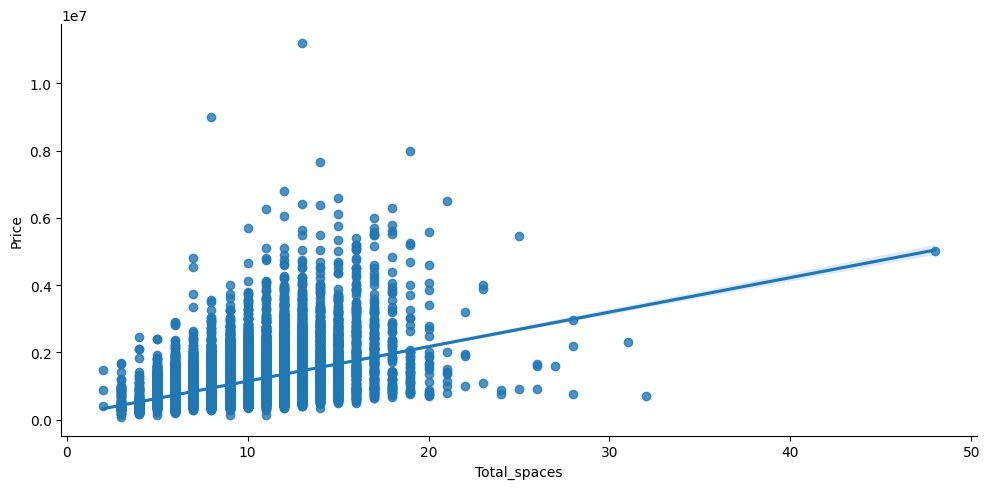

In [45]:
plt.figure(figsize = (20,7));
sns.lmplot(data = og_set, x = "Total_spaces", y = "Price", height = 5, aspect = 2);

There is a relationship that tends to increse the price if a house has more spaces but there is not a robust conclusion. So I will see the correlation between the variables 

In [46]:
og_set[["Total_spaces", "Price"]].corr()

,Total_spaces,Price
Total_spaces,1.000000,0.458282
Price,0.458282,1.000000


Very high correlation but cor is no cau. So it will need further analysis 

### Distance and Price

<Figure size 2000x700 with 0 Axes>

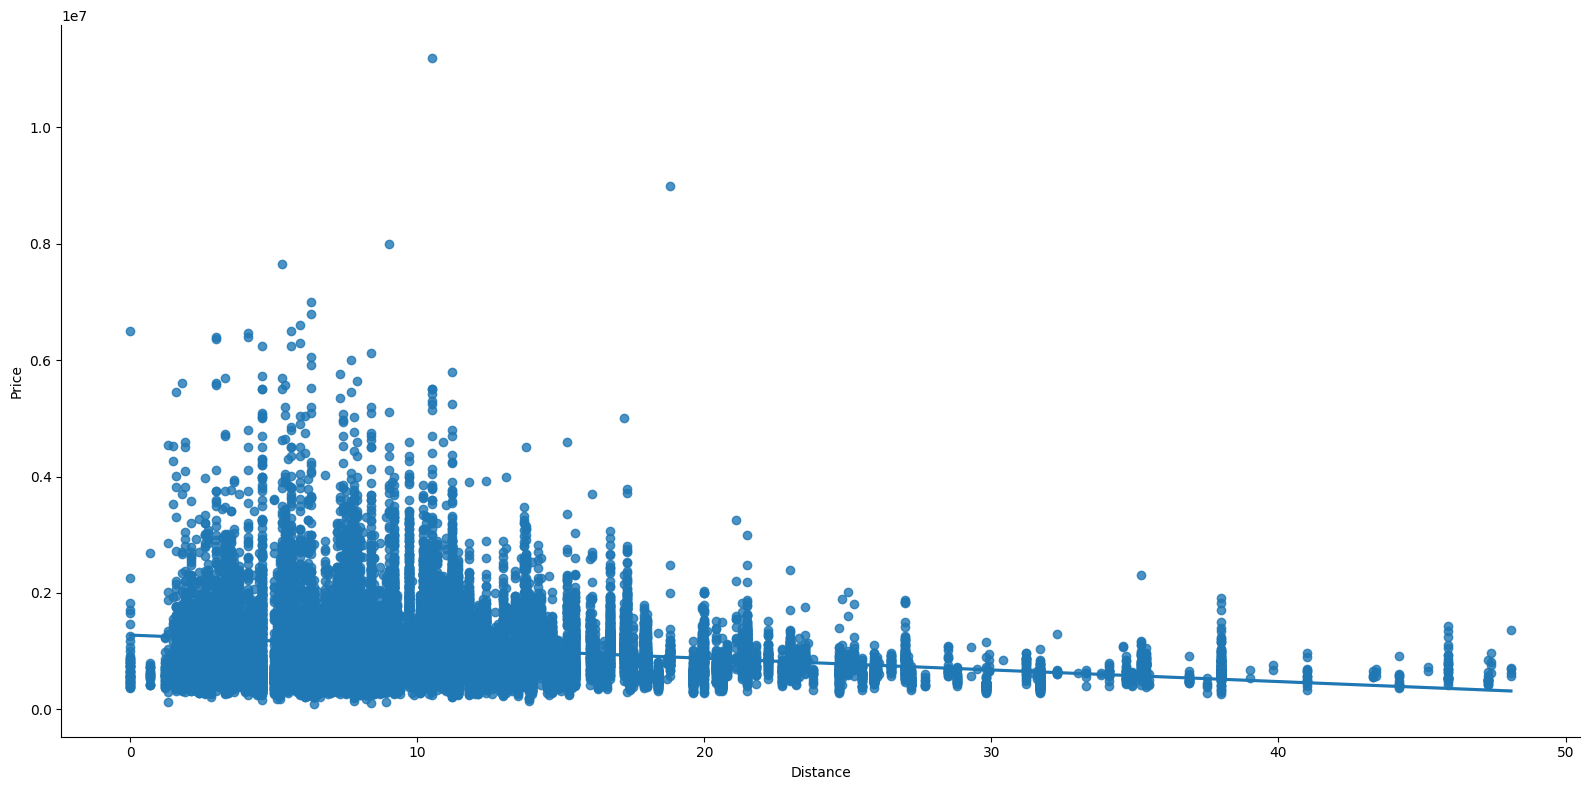

In [47]:
plt.figure(figsize = (20,7));
sns.lmplot(data = og_set, x = "Distance", y = "Price", height = 8, aspect = 2);

In [48]:
og_set[["Distance", "Price"]].corr()

,Distance,Price
Distance,1.000000,-0.211194
Price,-0.211194,1.000000


It has a relatively low negative cor but it indicates that if the distance increases and price generaly will go down

### I will create bins for distance 
0-15km Nearby
15-30km Moderately close 
30-50km Far


In [49]:
og_set["Distance_bins"] = pd.cut(og_set['Distance'],
                                bins = [0,15,30,50],
                                labels = ['Nearby', "Mederately close", "Far"],
                                right = False)
# right = False will make the funtion count the 0 bin 

In [50]:
og_set["Distance_bins"]

0                  Nearby
1                  Nearby
2                  Nearby
3                  Nearby
4                  Nearby
               ...       
27098    Mederately close
27099              Nearby
27100    Mederately close
27101    Mederately close
27102    Mederately close
Name: Distance_bins, Length: 27103, dtype: category
Categories (3, object): ['Nearby' < 'Mederately close' < 'Far']

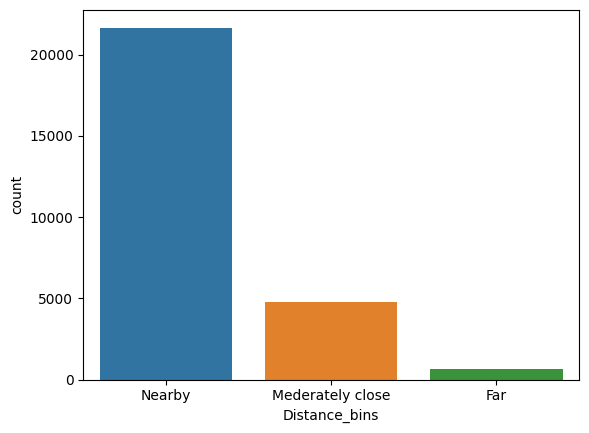

In [51]:
# lets see the distibution with a barplot and a boxplot
sns.countplot(data = og_set,  x = "Distance_bins");

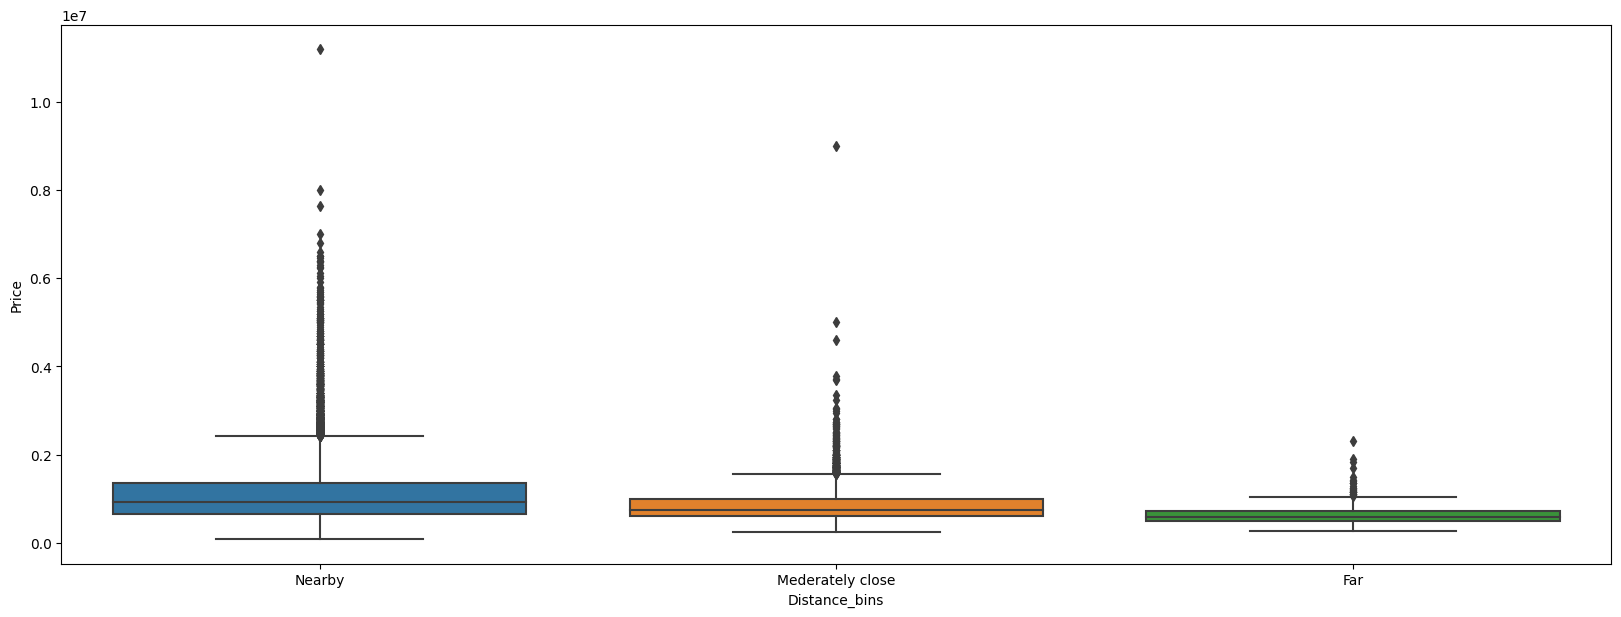

In [52]:
plt.figure(figsize = (20,7));
sns.boxplot(data = og_set , x = "Distance_bins", y = "Price");

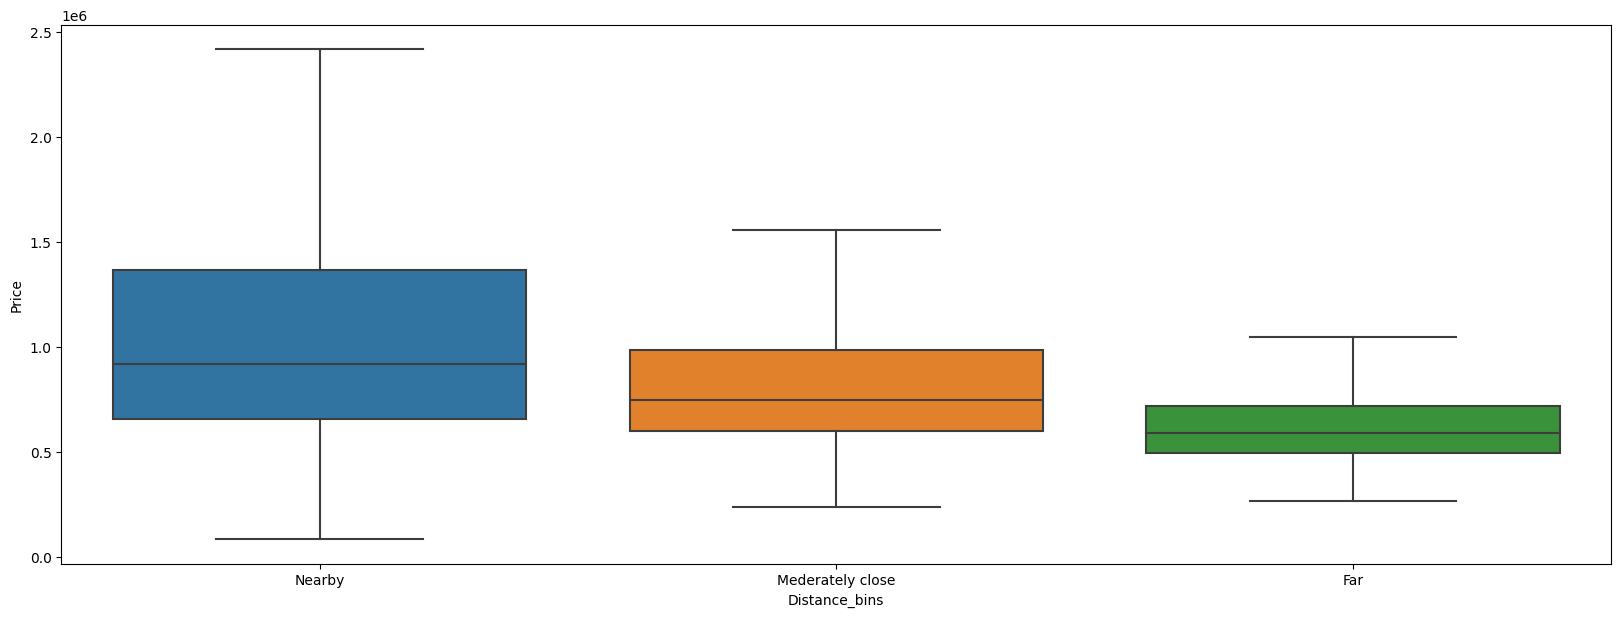

In [53]:
# now I want to see just the box plot without the outliers so same code line but at the end showfliers = False
plt.figure(figsize = (20,7));
sns.boxplot(data = og_set , x = "Distance_bins", y = "Price", showfliers = False);



*   If its far it generaly would be cheaper than the one nearby the center of the city or the CBD
* Nearby houses has a quite high var(x) 




### Year built and Price
But I will get a new variable that will have only the year of the sale and to compare it with the year it was built each house 

In [54]:
Year_Sale = og_set["Date"].dt.year # dt.year  will only include the year of each datetime 
Year_Sale

0        2016
1        2016
2        2016
3        2016
4        2016
         ... 
27098    2017
27099    2017
27100    2017
27101    2017
27102    2017
Name: Date, Length: 27103, dtype: int64

In [55]:
# there are some missing values in Sale_year
# now let see the range between Year Built and Year Sale and call Age_prop
og_set["Age_prop"] = Year_Sale - og_set["YearBuilt"]
og_set.head()

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,Total_spaces,Distance_bins,Age_prop
0,Airport West,3,t,Nelson,2016-03-09,13.5,3042.0,3.0,2.0,1.0,303.0,225.0,2016.0,Western Metropolitan,3464,840000,9.0,Nearby,0.0
1,Albert Park,2,h,hockingstuart,2016-03-09,3.3,3206.0,2.0,1.0,0.0,120.0,82.0,1900.0,Southern Metropolitan,3280,1275000,5.0,Nearby,116.0
2,Albert Park,2,h,Thomson,2016-03-09,3.3,3206.0,2.0,1.0,0.0,159.0,NaN,NaN,Southern Metropolitan,3280,1455000,5.0,Nearby,NaN
3,Alphington,4,h,Brace,2016-03-09,6.4,3078.0,3.0,2.0,4.0,853.0,263.0,1930.0,Northern Metropolitan,2211,2000000,13.0,Nearby,86.0
4,Alphington,3,h,Jellis,2016-03-09,6.4,3078.0,3.0,2.0,2.0,208.0,NaN,2013.0,Northern Metropolitan,2211,1110000,10.0,Nearby,3.0


In [56]:
# lets make a quick scan of the unique values of the new column 
og_set["Age_prop"].unique()

array([  0., 116.,  nan,  86.,   3.,   1.,  51.,  46.,  52.,  66.,  36.,
        96.,  31.,  16.,  56.,  42.,  19.,   8.,  76., 111.,  59., 126.,
        81.,  27.,   7.,  61.,  41., 106.,  12.,   6., 136.,   9.,  91.,
        15.,  11., 112.,  21.,  26.,   4.,  23.,  13.,  38.,  18., 127.,
         2.,  -1.,  39.,  10.,   5.,  14.,  97., 101.,  47., 153., 123.,
       104.,  48.,  44.,  17.,  73.,  65.,  94.,  20.,  24.,  58.,  54.,
        49.,  82., 129.,  40.,  71.,  43.,  22.,  33.,  34.,  98.,  30.,
        63.,  88.,  68.,  75.,  67.,  28.,  25.,  92., 119.,  93.,  32.,
        29., 160., 114.,  50.,  55.,  87.,  64., 131.,  78., 146.,  45.,
       113., 110., 148., 109.,  53.,  77.,  89.,  60.,  37., 156., 132.,
        90., 128.,  62.,  57., 117., 107.,  79.,  35., 137.,  80., 102.,
        72.,  95., 103.,  74., 122., 142.,  69., 130., 100., 157., 155.,
       108.,  83., 118., 138., 133., 149.,  70., 147., 162., 124., 141.,
        99.,  85., 154., 115., 167., 121., 105., 12

#### Big problem: 
There are not negative ages, but the column has them. 

Possibilities: 

Data entry mistake 

There was sold before it was built 

My mistake

In [57]:
# With the scan  there are -1 and -2 unique values so lets see those ones 
# But lets get all those ones < 0
og_set[og_set["Age_prop"]<0]

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,Total_spaces,Distance_bins,Age_prop
285,Avondale Heights,3,t,Nelson,2016-03-12,10.5,3034.0,3.0,3.0,1.0,557.0,181.0,2017.0,Western Metropolitan,4502,851000,10.0,Nearby,-1.0
13854,Bentleigh,3,h,Woodards,2018-03-17,11.4,3204.0,3.0,1.0,4.0,635.0,242.0,2019.0,Southern Metropolitan,6795,1100000,11.0,Nearby,-1.0
15232,Reservoir,4,h,Barry,2016-09-17,11.2,3073.0,3.0,2.0,2.0,834.0,129.0,2017.0,Northern Metropolitan,21650,767500,11.0,Nearby,-1.0
19463,Keilor East,3,h,Nelson,2016-04-23,12.8,3033.0,3.0,2.0,1.0,630.0,126.0,2017.0,Western Metropolitan,5629,825000,9.0,Nearby,-1.0
21326,Brighton East,2,h,Buxton,2016-09-24,10.7,3187.0,4.0,3.0,2.0,302.0,250.0,2018.0,Southern Metropolitan,6938,1310000,11.0,Nearby,-2.0
24897,Newport,3,h,Jas,2016-05-28,8.4,3015.0,4.0,2.0,1.0,487.0,190.0,2017.0,Western Metropolitan,5498,945000,10.0,Nearby,-1.0
27069,Heidelberg,3,h,Miles,2016-07-30,10.6,3084.0,5.0,3.0,2.0,649.0,357.0,2017.0,Eastern Metropolitan,2890,1030000,13.0,Nearby,-1.0


### Will need more information for this houses and sales 
Contact with the sellers: 
Nelson...
Woodards...
Barry...
Buxton...
Jas...
Miles...


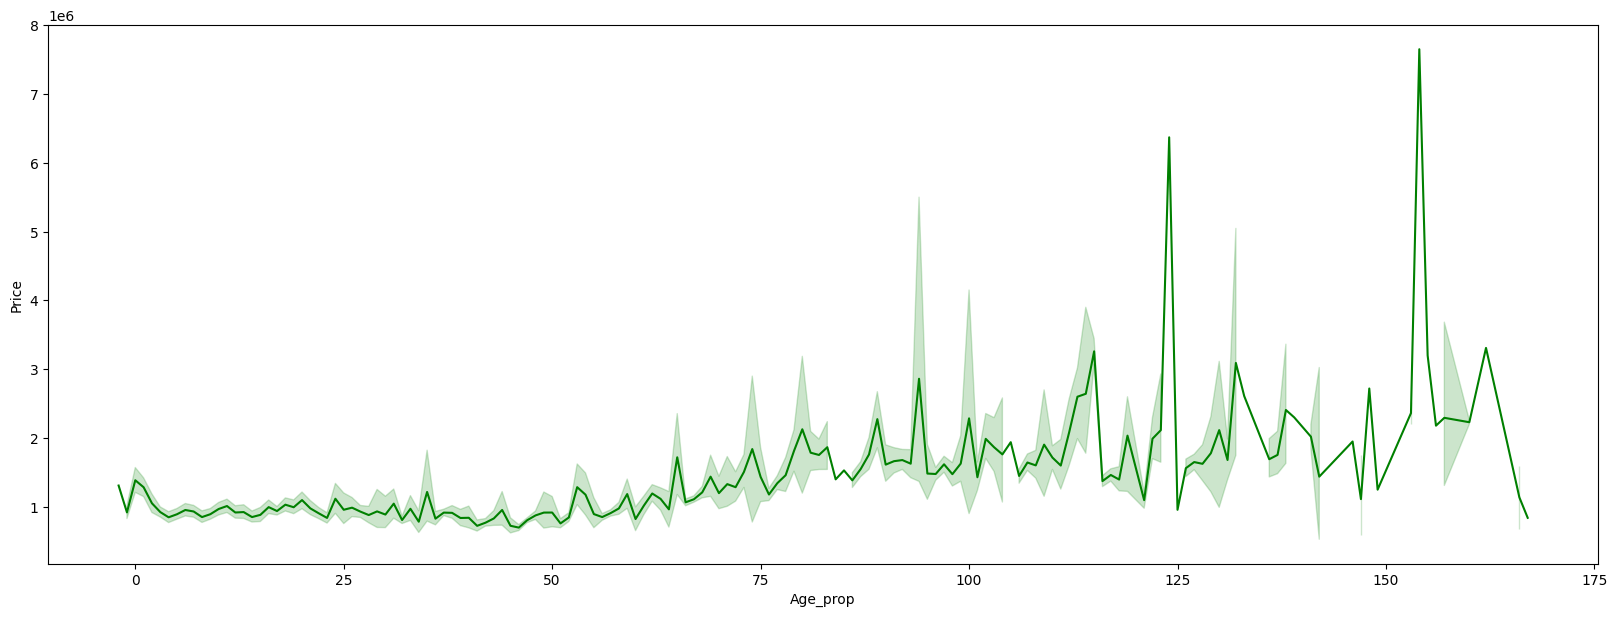

In [58]:
plt.figure(figsize = (20,7))
sns.lineplot(data = og_set, x = "Age_prop", y = "Price", color = "green");

In [59]:
# cor (Age_prop, Price)
og_set[["Age_prop", "Price"]].corr()

,Age_prop,Price
Age_prop,1.000000,0.341085
Price,0.341085,1.000000




*   The correlation is moderately high as the cor between yearbuilt and price but this one is a little bit weaker 0.34

*   The buyers who are into vintage properties will be more likely to spend more money



Lets see if that behaviur is particular of a specific region 

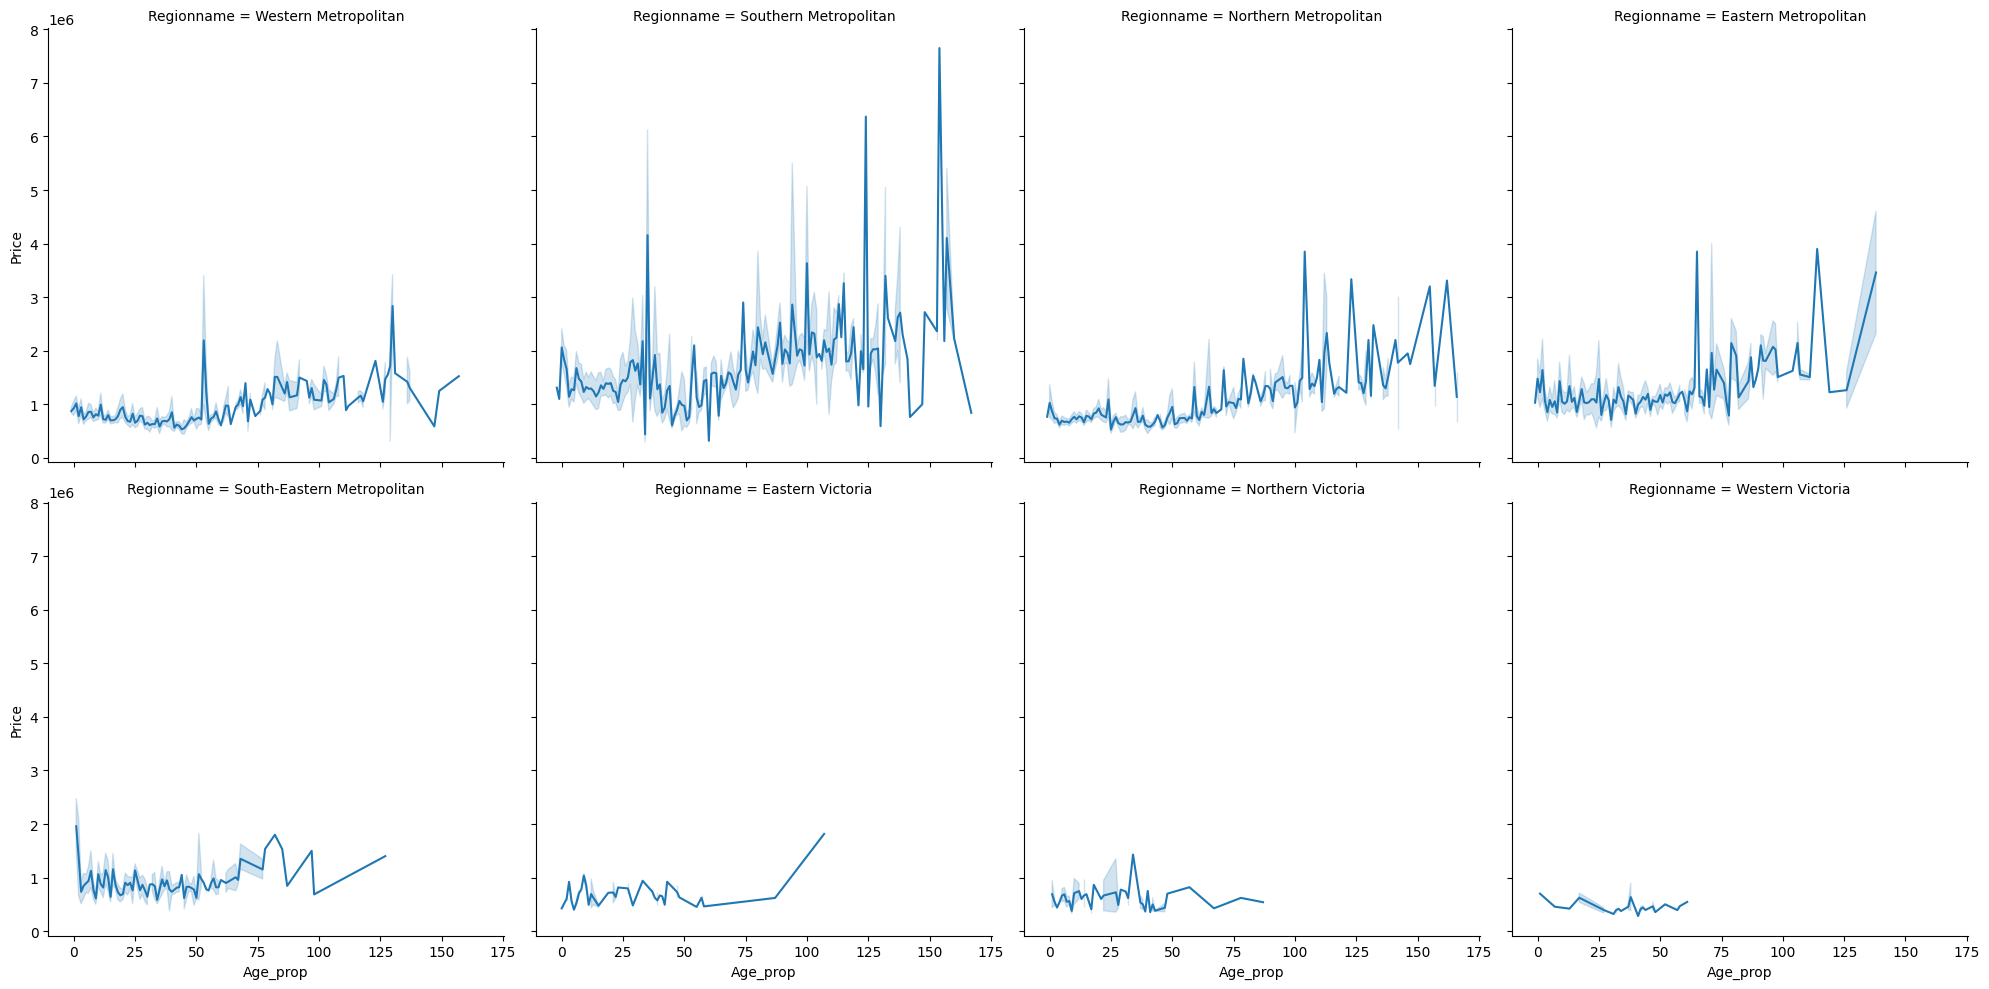

In [60]:
# relplot = line or scatter but it allows you to use the col argument inside 
sns.relplot(data = og_set, x = "Age_prop", y = "Price", col = "Regionname", kind = "line", col_wrap = 4)


Where the cor is higher , the first one been the highest
*   Southern M
*   Norththen M and Eastern M
*   Western M 


So the behaviur is more likely to be the Metropolitan area


### Type and Price

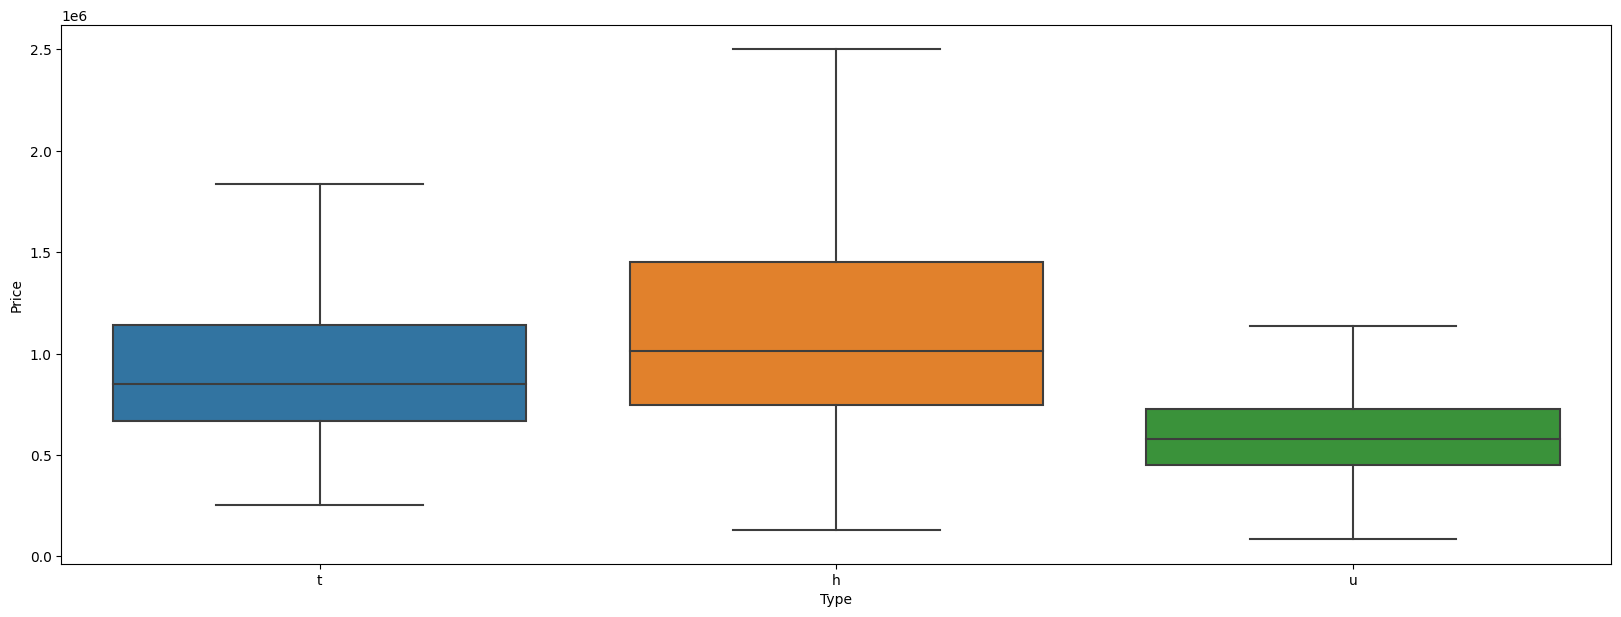

In [61]:
plt.figure(figsize=(20,7))
sns.boxplot(data = og_set, x = "Type", y = "Price", showfliers = False);



*   h has the highest var(x) and the higher prices for the 50% of the data 
*   t pretty average and u beem the one with the smallest var(x) and price range in the 50% of its data



### Region name and Price

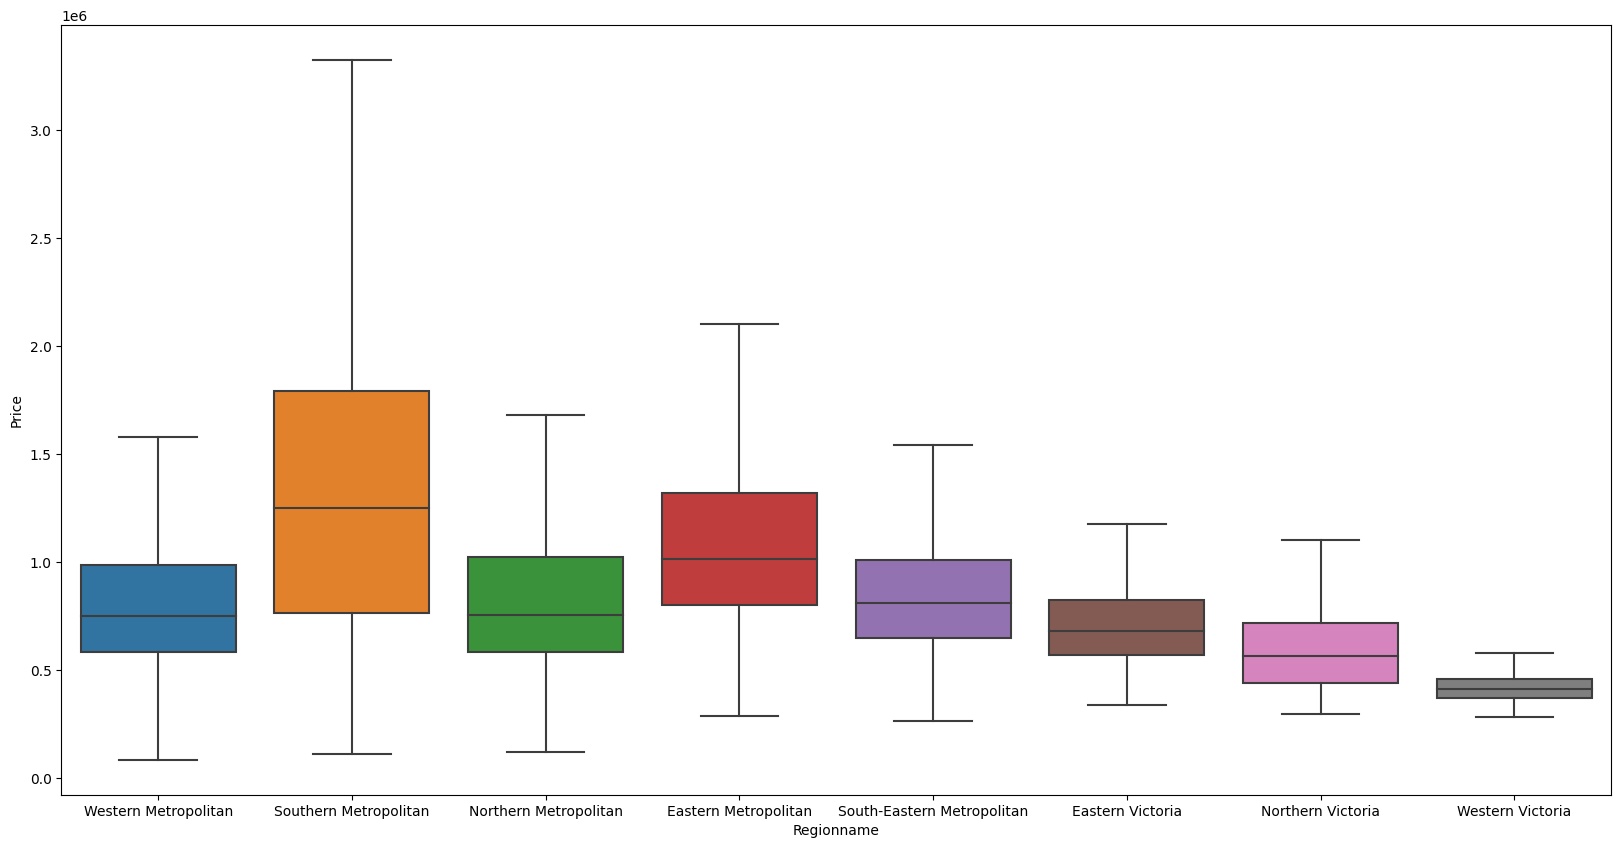

In [62]:
plt.figure(figsize = (20,10))
sns.boxplot(data = og_set, x = "Regionname", y = "Price", showfliers = False); 



*   Southern M biggest var(x) and also has the higher and smaller price
*   Western victoria is not a great place to invest, just if you want the cheapest and maybe the more secure investment



### Missing Value Treatment

In [63]:
#Imputation
# mean, median and mode
# mean when there are not a lot of outliers 
# median when there are a lot of outliers
# mode when is highly skewed towards right or left 

In [64]:
# lets see wich columns have nan values 
# very good code line 
pd.DataFrame({"Count": og_set.isnull().sum()[og_set.isnull().sum()>0],
              "Percentage": (og_set.isnull().sum()[og_set.isnull().sum()>0]/og_set.shape[0])*100})

,Count,Percentage
Distance,1,0.003690
Postcode,1,0.003690
Bedroom,6425,23.705863
Bathroom,6431,23.728001
Car,6806,25.111611
Landsize,9230,34.055271
BuildingArea,16574,61.151902
YearBuilt,15118,55.779803
Total_spaces,6806,25.111611
Distance_bins,1,0.003690




1.   Distance , postcode and distance_bins have only 1 missing value so I can look for them individualy 
2.   The rest I give have to explore solutions 



In [65]:
# Distance
og_set.loc[og_set["Distance"].isnull() == True]

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,Total_spaces,Distance_bins,Age_prop
9590,Fawkner Lot,3,h,Brad,2018-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,962,616000,NaN,NaN,NaN


In [66]:
# Postcode
og_set.loc[og_set["Postcode"].isnull() == True]

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,Total_spaces,Distance_bins,Age_prop
9590,Fawkner Lot,3,h,Brad,2018-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,962,616000,NaN,NaN,NaN


In [67]:
# Distance_bins
og_set.loc[og_set["Distance_bins"].isnull() == True]

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,Total_spaces,Distance_bins,Age_prop
9590,Fawkner Lot,3,h,Brad,2018-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,962,616000,NaN,NaN,NaN




*   It is the same house , the 9590 row and it has so many nan data that it would make sense to remove it




In [68]:
# drop the row but reset the index
og_set = og_set.drop(9590).reset_index(drop = True)

In [69]:
pd.DataFrame({"Count": og_set.isnull().sum()[og_set.isnull().sum()>0],
              "Percentage": (og_set.isnull().sum()[og_set.isnull().sum()>0]/og_set.shape[0])*100})

,Count,Percentage
Bedroom,6424,23.703048
Bathroom,6430,23.725186
Car,6805,25.108848
Landsize,9229,34.052837
BuildingArea,16573,61.150469
YearBuilt,15117,55.778171
Total_spaces,6805,25.108848
Age_prop,15117,55.778171


There is no more nan in distance, postcode and distance bins

In [70]:
# now lets see bedroom nan rows 
og_set.loc[og_set["Bedroom"].isnull() == True]

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price,Total_spaces,Distance_bins,Age_prop
8,Altona North,4,h,hockingstuart,2016-03-09,11.1,3025.0,NaN,NaN,NaN,NaN,NaN,NaN,Western Metropolitan,5132,857500,NaN,Nearby,NaN
12,Ashburton,2,h,Marshall,2016-03-09,11.0,3147.0,NaN,NaN,NaN,NaN,NaN,NaN,Southern Metropolitan,3052,1820000,NaN,Nearby,NaN
14,Avondale Heights,4,h,Jellis,2016-03-09,10.5,3034.0,NaN,NaN,NaN,NaN,NaN,NaN,Western Metropolitan,4502,1310000,NaN,Nearby,NaN
25,Balwyn North,4,u,hockingstuart,2016-03-09,9.2,3104.0,NaN,NaN,NaN,NaN,NaN,NaN,Southern Metropolitan,7809,1450000,NaN,Nearby,NaN
26,Balwyn North,2,h,Fletchers,2016-03-09,9.2,3104.0,NaN,NaN,NaN,NaN,NaN,NaN,Southern Metropolitan,7809,1305000,NaN,Nearby,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27088,Footscray,2,u,McGrath,2017-09-30,5.1,3011.0,NaN,NaN,NaN,NaN,NaN,NaN,Western Metropolitan,7570,455500,NaN,Nearby,NaN
27089,Forest Hill,2,h,Fletchers,2017-09-30,15.4,3131.0,NaN,NaN,NaN,NaN,NaN,NaN,Eastern Metropolitan,4385,762000,NaN,Mederately close,NaN
27090,Glen Waverley,3,u,Ray,2017-09-30,16.7,3150.0,NaN,NaN,NaN,NaN,NaN,NaN,Eastern Metropolitan,15321,1100000,NaN,Mederately close,NaN
27093,Kingsbury,2,t,RW,2017-09-30,12.1,3083.0,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,1414,512000,NaN,Nearby,NaN


#### Important code line

In [71]:
# lets see wich ones who have null entrys in bedroom also have them in bathroom, car, landsize... etc 
print(og_set.loc[og_set["Bedroom"].isnull()==True, "Bathroom"].value_counts(dropna=False))
print("-"*50)
print(og_set.loc[og_set["Bedroom"].isnull()==True, "Car"].value_counts(dropna=False))
print("-"*50)
print(og_set.loc[og_set["Bedroom"].isnull()==True, "Landsize"].value_counts(dropna=False))
print("-"*50)
print(og_set.loc[og_set["Bedroom"].isnull()==True, "BuildingArea"].value_counts(dropna=False))
print("-"*50)
print(og_set.loc[og_set["Bedroom"].isnull()==True, "YearBuilt"].value_counts(dropna=False))

NaN    6424
Name: Bathroom, dtype: int64
--------------------------------------------------
NaN    6424
Name: Car, dtype: int64
--------------------------------------------------
NaN      6418
594.0       1
446.0       1
338.0       1
250.0       1
549.0       1
239.0       1
Name: Landsize, dtype: int64
--------------------------------------------------
NaN    6424
Name: BuildingArea, dtype: int64
--------------------------------------------------
NaN    6424
Name: YearBuilt, dtype: int64


The number of null entrys are the same in 
- bedroom 
- bathroom 
- car
-building area 
- yearbuilt
 
 Not the case in landsize and it wasnt analized total spaces and age of the property because there not original metrics or columns

In [72]:
# lets see if the location of the house has some relation with the missing values
print(og_set.loc[og_set["Bedroom"].isnull()==True, "Suburb"].value_counts(dropna=False))
print("-"*50)
print(og_set.loc[og_set["Bedroom"].isnull()==True, "Regionname"].value_counts(dropna=False))

Reservoir          236
Bentleigh East     144
St Kilda           116
Glenroy            116
Richmond           111
                  ... 
Cranbourne East      1
Melton West          1
New Gisborne         1
Scoresby             1
Plenty               1
Name: Suburb, Length: 307, dtype: int64
--------------------------------------------------
Southern Metropolitan         2197
Northern Metropolitan         1912
Western Metropolitan          1212
Eastern Metropolitan           728
South-Eastern Metropolitan     317
Eastern Victoria                26
Northern Victoria               25
Western Victoria                 7
Name: Regionname, dtype: int64




*   The pattern is not strong 



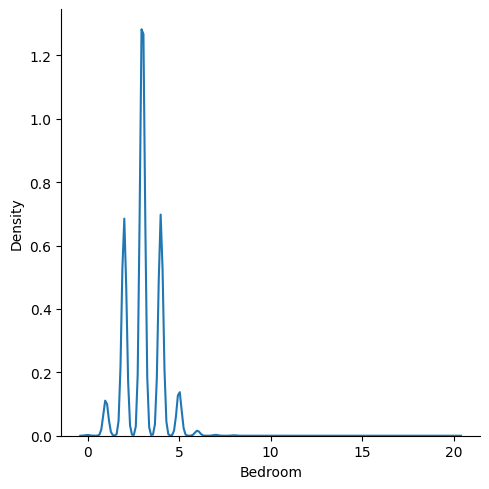

In [73]:
# lets analize the distribution for bedroom , bathroom and car 
sns.displot(data = og_set, x = "Bedroom", kind = "kde")

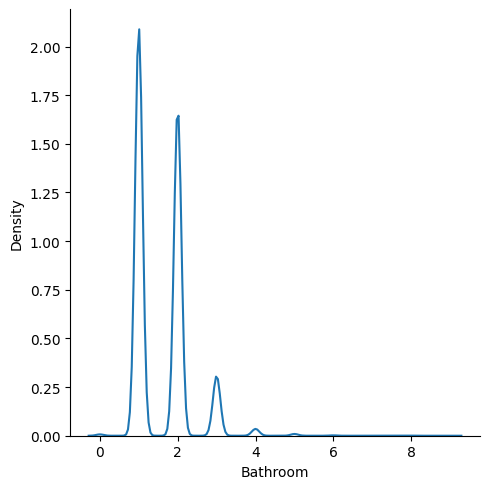

In [74]:
sns.displot(data = og_set, x = "Bathroom", kind = "kde")

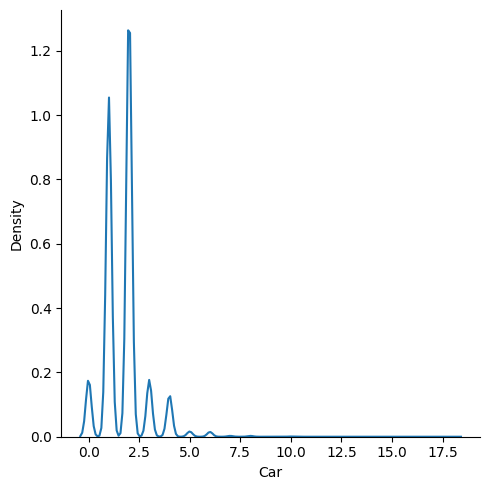

In [75]:
sns.displot(data = og_set, x = "Car", kind = "kde")

In [76]:
# they are not that skewed to right so it may work to use the mean
# lets make the mean of the bathroom , bedroom and car but for each region and type 
# this will make the mean a more optimal mesure to replace the null entrys 
og_set.groupby(["Regionname","Type"])["Bedroom", "Bathroom", "Car"].mean()

<ipython-input-76-66c4c1f8e345>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  og_set.groupby(["Regionname","Type"])["Bedroom", "Bathroom", "Car"].mean()


Bedroom  Bathroom       Car
Regionname                 Type                              
Eastern Metropolitan       h     3.551948  1.806961  1.946176
                           t     3.032051  1.852564  1.673077
                           u     2.357143  1.263393  1.290179
Eastern Victoria           h     3.559701  1.880597  2.098485
                           u     2.666667  1.000000  1.333333
Northern Metropolitan      h     3.106336  1.467878  1.684897
                           t     2.567198  1.619590  1.362187
                           u     1.878049  1.160127  1.092652
Northern Victoria          h     3.496403  1.892086  2.145985
                           u     3.000000  2.000000  2.000000
South-Eastern Metropolitan h     3.475924  1.713326  2.093574
                           t     2.886792  1.849057  1.679245
                           u     2.260274  1.205479  1.342466
Southern Metropolitan      h     3.383430  1.840283  1.882764
                           t     3.024014  2.012027  1.779690
                           u     1.938541  1.190805  1.134870
Western Metropolitan       h     3.244238  1.576159  1.906782
                           t     2.879747  1.850794  1.538217
                           u     2.106339  1.192229  1.143737
Western Victoria           h     3.379310  1.448276  2.060241

#### Very pythonic code line 

In [77]:
# to replace each entry with each mean of type and region 
# it has to be in different code spaces
og_set["Bedroom"] = og_set["Bedroom"].fillna( value = og_set.groupby(["Regionname","Type"])["Bedroom"].transform("mean"))


In [78]:
og_set["Bathroom"] = og_set["Bathroom"].fillna( value = og_set.groupby(["Regionname","Type"])["Bathroom"].transform("mean"))


In [79]:
og_set["Car"] = og_set["Car"].fillna( value = og_set.groupby(["Regionname","Type"])["Car"].transform("mean"))


In [80]:
# lets see if it worked 
pd.DataFrame({"Count": og_set.isnull().sum()[og_set.isnull().sum()>0],
              "Percentage": (og_set.isnull().sum()[og_set.isnull().sum()>0]/og_set.shape[0])*100})

,Count,Percentage
Landsize,9229,34.052837
BuildingArea,16573,61.150469
YearBuilt,15117,55.778171
Total_spaces,6805,25.108848
Age_prop,15117,55.778171


In [81]:
# now we have a problem because there are not 3.5 bedrooms so we will need to make those floats ints
og_set["Bedroom"] = og_set["Bedroom"].astype(int)
og_set["Bathroom"] = og_set["Bathroom"].astype(int)
og_set["Car"] = og_set["Car"].astype(int)

In [82]:
# lets see those columns 
og_set[["Bedroom", "Bathroom", "Car"]]

,Bedroom,Bathroom,Car
0,3,2,1
1,2,1,0
2,2,1,0
3,3,2,4
4,3,2,2
...,...,...,...
27097,3,1,6
27098,3,1,1
27099,4,2,2
27100,3,2,1


In [83]:
#Now the data is correct
# but due to the fact that total spaces was a new column made from car, bedrooms and bathrooms 
# we will need to recalculate properly again 
og_set.drop("Total_spaces", axis = 1, inplace = True)
# create the new total spaces 
og_set["Total_spaces_new"] = og_set["Bedroom"] + og_set["Bathroom"] + og_set["Car"]
og_set["Total_spaces_new"] = og_set["Total_spaces_new"].astype(int)

<Figure size 2000x700 with 0 Axes>

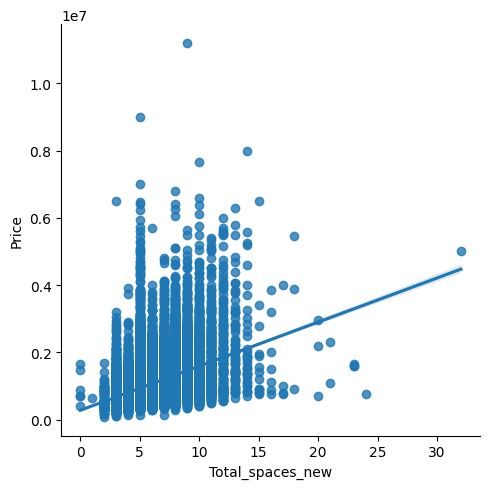

In [84]:
# now lets recreate that lmplot but with the new data 
plt.figure(figsize = (20,7));
sns.lmplot(data = og_set, x = "Total_spaces_new", y = "Price");

In [85]:
# cor 
# before 45.82 % 
# after 42.30 %
og_set[["Total_spaces_new", "Price"]].corr()

,Total_spaces_new,Price
Total_spaces_new,1.000000,0.423023
Price,0.423023,1.000000


In [86]:
pd.DataFrame({"Count": og_set.isnull().sum()[og_set.isnull().sum()>0],
              "Percentage": (og_set.isnull().sum()[og_set.isnull().sum()>0]/og_set.shape[0])*100})

,Count,Percentage
Landsize,9229,34.052837
BuildingArea,16573,61.150469
YearBuilt,15117,55.778171
Age_prop,15117,55.778171


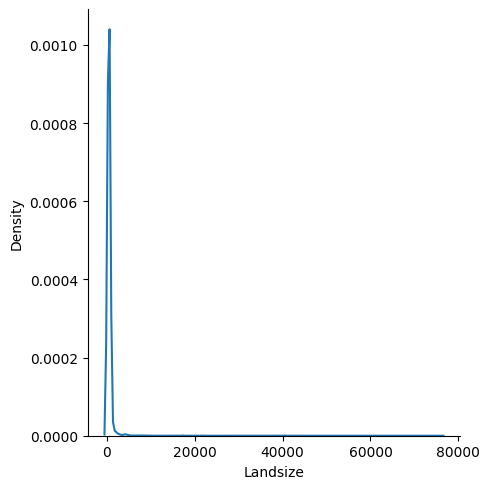

In [87]:
# lets analize landsize
sns.displot(data = og_set, x = "Landsize", kind =  "kde")

Due to the fact that is higly skewed to right it would be a good idea to use the median instead of the mean to replace the null values

In [88]:
og_set.groupby(["Regionname", "Type"])["Landsize"].median()

Regionname                  Type
Eastern Metropolitan        h       693.5
                            t       236.0
                            u       208.0
Eastern Victoria            h       840.0
                            u       230.0
Northern Metropolitan       h       482.0
                            t       145.0
                            u        50.0
Northern Victoria           h       737.5
                            u       315.0
South-Eastern Metropolitan  h       632.0
                            t       248.0
                            u       210.0
Southern Metropolitan       h       593.0
                            t       267.0
                            u        50.0
Western Metropolitan        h       537.0
                            t       200.0
                            u        80.0
Western Victoria            h       603.0
Name: Landsize, dtype: float64

In [89]:
og_set["Landsize"] = og_set["Landsize"].fillna( value = og_set.groupby(["Regionname","Type"])["Landsize"].transform("median"))

In [90]:
pd.DataFrame({"Count": og_set.isnull().sum()[og_set.isnull().sum()>0],
              "Percentage": (og_set.isnull().sum()[og_set.isnull().sum()>0]/og_set.shape[0])*100})

,Count,Percentage
BuildingArea,16573,61.150469
YearBuilt,15117,55.778171
Age_prop,15117,55.778171


In [91]:
# big problem 
# all o fthe columns left to work with have more than 50% of it information missing 
# so it would not be a good idea to use this data to create info so lets remove those columns 
# and save the newest version of the data set
melbourne_housing_lvdf = og_set.drop(["BuildingArea", "YearBuilt", "Age_prop"], axis = 1)

In [92]:
melbourne_housing_lvdf.head()

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,Regionname,Propertycount,Price,Distance_bins,Total_spaces_new
0,Airport West,3,t,Nelson,2016-03-09,13.5,3042.0,3,2,1,303.0,Western Metropolitan,3464,840000,Nearby,6
1,Albert Park,2,h,hockingstuart,2016-03-09,3.3,3206.0,2,1,0,120.0,Southern Metropolitan,3280,1275000,Nearby,3
2,Albert Park,2,h,Thomson,2016-03-09,3.3,3206.0,2,1,0,159.0,Southern Metropolitan,3280,1455000,Nearby,3
3,Alphington,4,h,Brace,2016-03-09,6.4,3078.0,3,2,4,853.0,Northern Metropolitan,2211,2000000,Nearby,9
4,Alphington,3,h,Jellis,2016-03-09,6.4,3078.0,3,2,2,208.0,Northern Metropolitan,2211,1110000,Nearby,7


In [93]:
pd.DataFrame({"Count": melbourne_housing_lvdf.isnull().sum()[melbourne_housing_lvdf.isnull().sum()>0],
              "Percentage": (melbourne_housing_lvdf.isnull().sum()[melbourne_housing_lvdf.isnull().sum()>0]/melbourne_housing_lvdf.shape[0])*100})

,Count,Percentage


In the lasted version of melbourne housing doesnt have any missing data 

In [94]:
# save the new dataframe
melbourne_housing_lvdf.to_csv("/content/drive/MyDrive/Colab Notebooks/data_sets/nomissingdf/Melbourne_Housing_NMD.csv")

## Outliers detection and treatment

In [95]:
# import the lasted version of the data frame 
mh_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data_sets/nomissingdf/Melbourne_Housing_NMD.csv")

##### code to create a lot of boxplots and see all the outliers of all the columns 

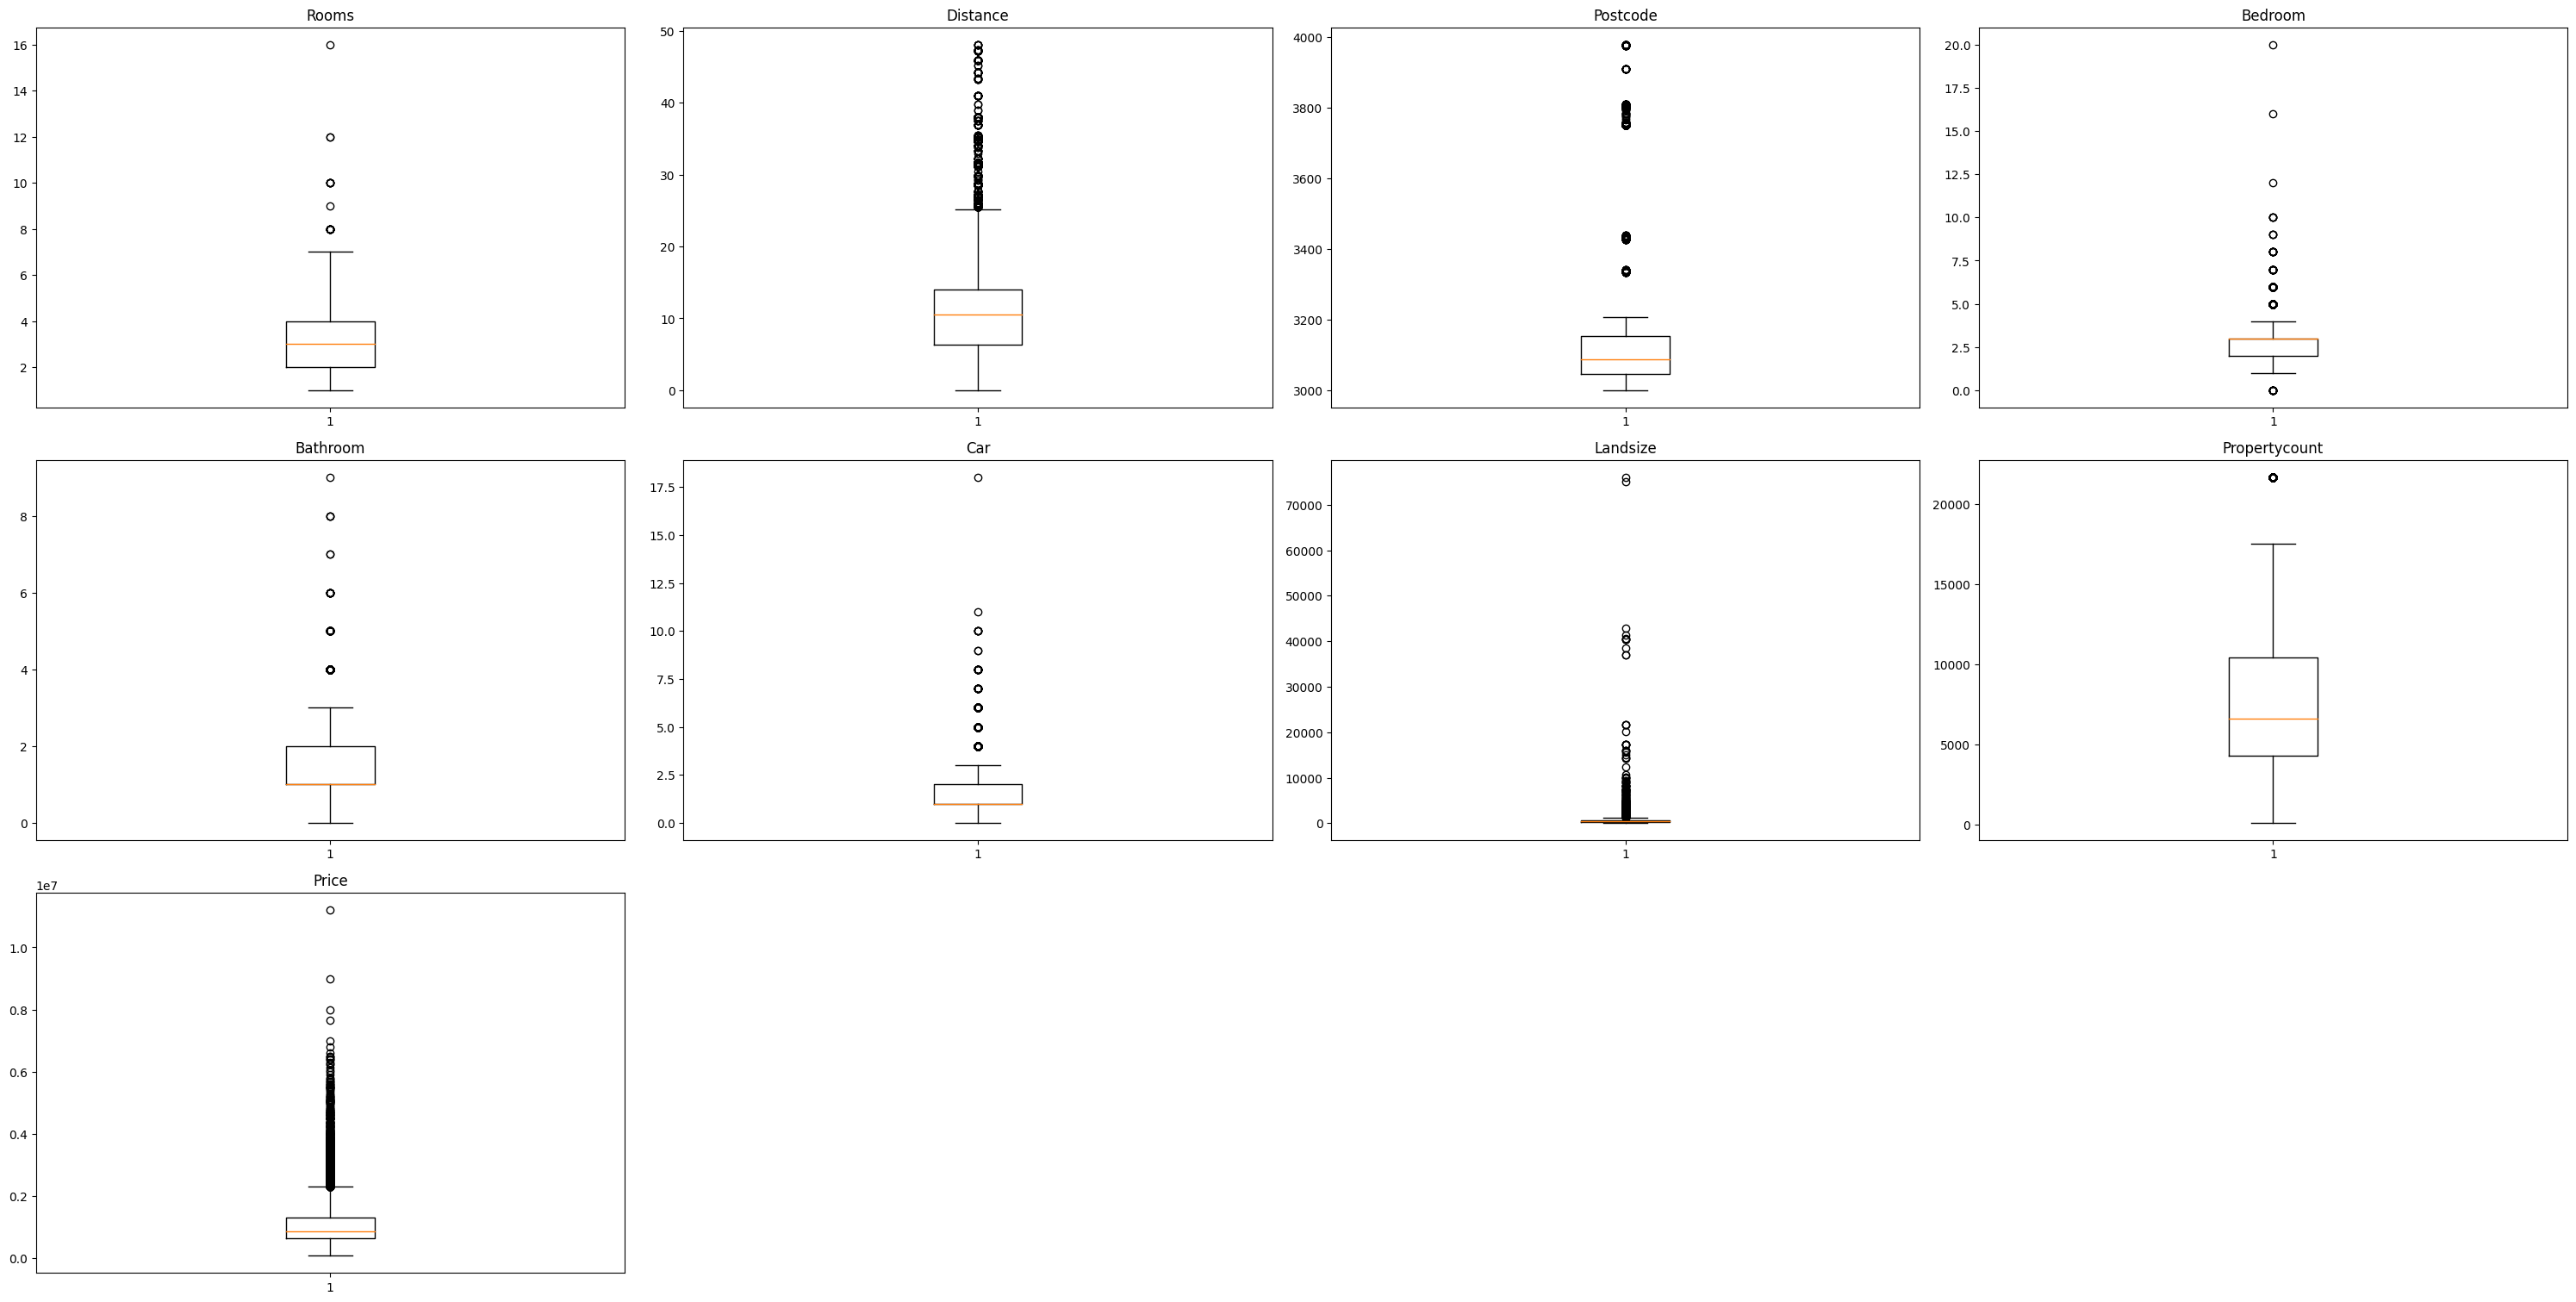

In [96]:
numeric_columns = ["Rooms", "Distance", "Postcode", "Bedroom", "Bathroom", "Car",
                   "Landsize", "Propertycount", "Price"]
plt.figure(figsize = (30,20))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(mh_df[variable], whis = 1.5)
    plt.tight_layout()
    plt.title(variable) 

due to the fact that we dont have the adress I am not able to go and find out if for example there is a house of 16 rooms or 20 bedrooms

Outliers that makes sense 


*  Distance 
*  Postcode ( it is categorical but py read it like a numeric one)
* Propertycount because it can be a lot more houses in some place than anothers
* Price tends to have a lot of outliers 


Outliers that I will work on 


*   Rooms 
*   Bathrooms 
*   Car 
*   Landsize



In [97]:
# setting 
Q1 = mh_df[numeric_columns].quantile(0.25)
Q3 = mh_df[numeric_columns].quantile(0.75)

IQR = Q3 - Q1

lower_whisker = Q1 - 1.5 * IQR
higher_whisker = Q3 + 1.5 * IQR

In [98]:
# lets see the % of outliers in each column 
((mh_df[numeric_columns] < lower_whisker) | (mh_df[numeric_columns] > higher_whisker)).sum()/mh_df.shape[0]*100

Rooms            0.084865
Distance         4.342853
Postcode         2.911224
Bedroom          4.195262
Bathroom         0.870784
Car              4.305955
Landsize         1.741569
Propertycount    2.671390
Price            4.660173
dtype: float64

#### very useful code line to treat outliers 

In [99]:
# def 
def treat_outlier(df, col):
    '''
    treats the outliers in a variable 
    col: str , name of the numerical varibale
    col: name of the column
    '''
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1 - 1.5 * IQR
    higher_whisker = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower_whisker, higher_whisker)

    return  df

In [100]:
# lets use it with all the variables 
mh_df = treat_outlier(mh_df, "Rooms")

In [101]:
mh_df = treat_outlier(mh_df, "Bedroom")

In [102]:
mh_df = treat_outlier(mh_df, "Bathroom")

In [103]:
mh_df = treat_outlier(mh_df, "Car")

In [104]:
mh_df = treat_outlier(mh_df, "Landsize")

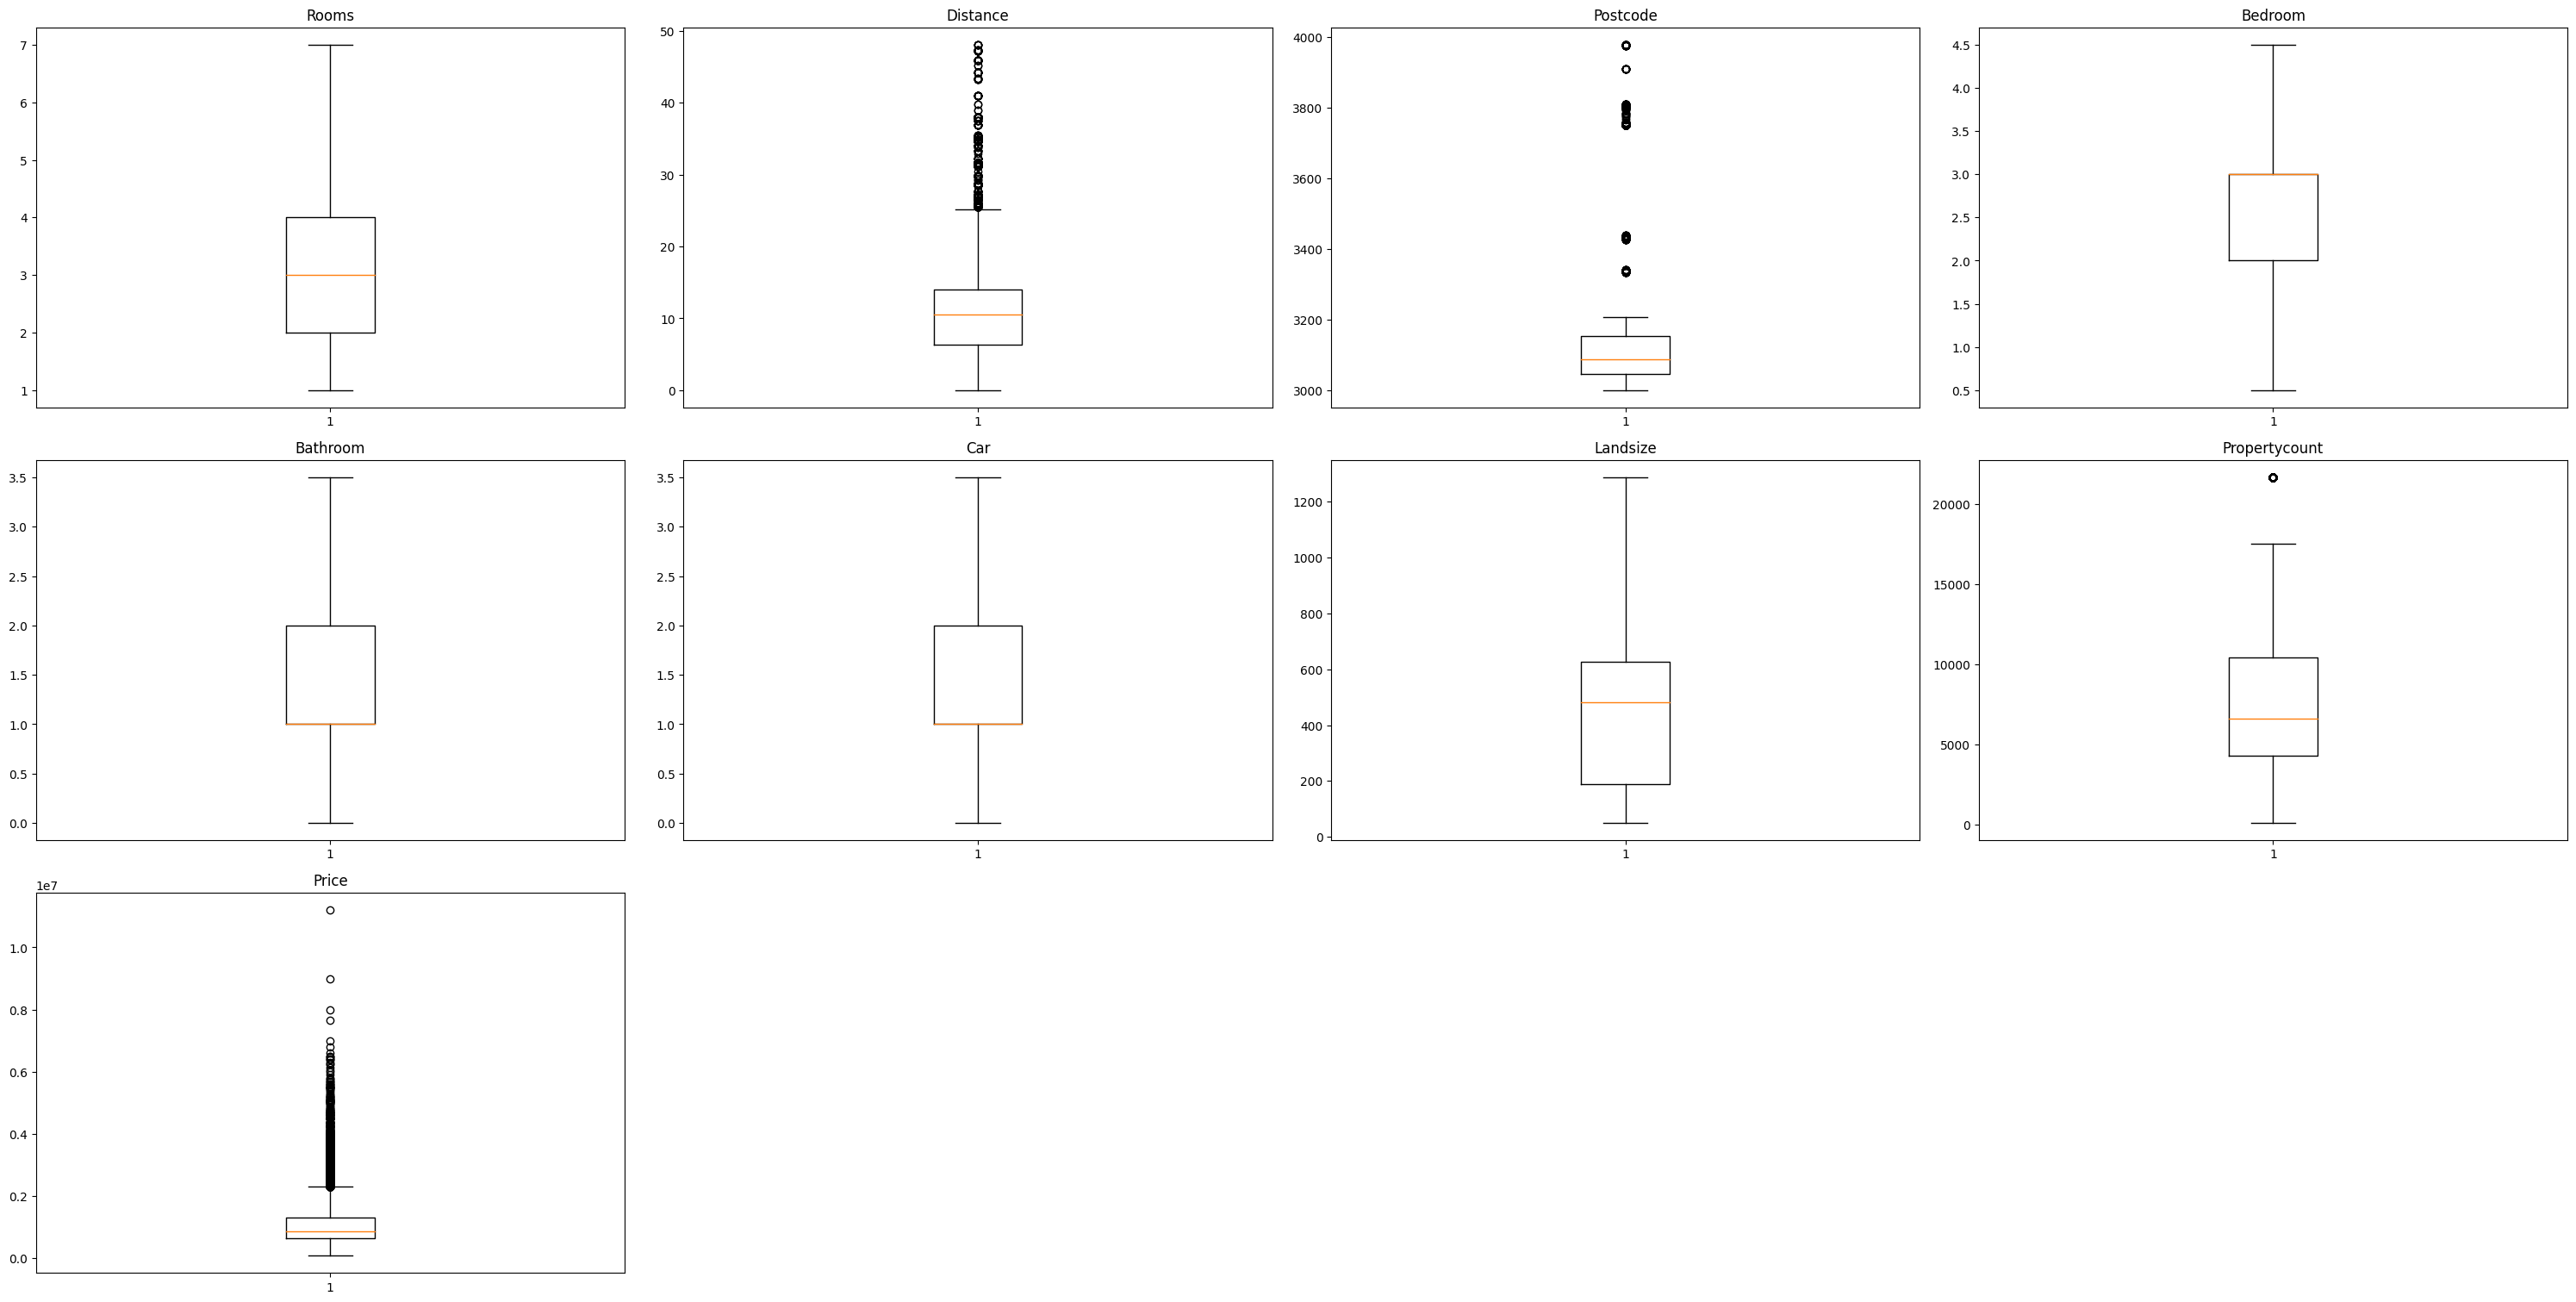

In [105]:
# lets see again the boxplots to see if it worked
plt.figure(figsize = (30,20))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(mh_df[variable], whis = 1.5)
    plt.tight_layout()
    plt.title(variable) 

In [106]:
mh_df.info()
# car , bedroom and bathrooms are floats lets change that 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27102 entries, 0 to 27101
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        27102 non-null  int64  
 1   Suburb            27102 non-null  object 
 2   Rooms             27102 non-null  float64
 3   Type              27102 non-null  object 
 4   SellerG           27102 non-null  object 
 5   Date              27102 non-null  object 
 6   Distance          27102 non-null  float64
 7   Postcode          27102 non-null  float64
 8   Bedroom           27102 non-null  float64
 9   Bathroom          27102 non-null  float64
 10  Car               27102 non-null  float64
 11  Landsize          27102 non-null  float64
 12  Regionname        27102 non-null  object 
 13  Propertycount     27102 non-null  int64  
 14  Price             27102 non-null  int64  
 15  Distance_bins     27102 non-null  object 
 16  Total_spaces_new  27102 non-null  int64 

In [107]:
mh_df["Bathroom"] = mh_df['Bathroom'].astype(int)
mh_df["Bedroom"] = mh_df['Bedroom'].astype(int)
mh_df["Car"] = mh_df['Car'].astype(int)

In [108]:
mh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27102 entries, 0 to 27101
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        27102 non-null  int64  
 1   Suburb            27102 non-null  object 
 2   Rooms             27102 non-null  float64
 3   Type              27102 non-null  object 
 4   SellerG           27102 non-null  object 
 5   Date              27102 non-null  object 
 6   Distance          27102 non-null  float64
 7   Postcode          27102 non-null  float64
 8   Bedroom           27102 non-null  int64  
 9   Bathroom          27102 non-null  int64  
 10  Car               27102 non-null  int64  
 11  Landsize          27102 non-null  float64
 12  Regionname        27102 non-null  object 
 13  Propertycount     27102 non-null  int64  
 14  Price             27102 non-null  int64  
 15  Distance_bins     27102 non-null  object 
 16  Total_spaces_new  27102 non-null  int64 

In [109]:
mh_df.to_csv("/content/drive/MyDrive/Colab Notebooks/data_sets/nomissingdf/Melbourne_Housing_NMD&NOD.csv")


# Conclusions:
- The dataset had quite a few missing data It had way to much outliers There is a strong correlation and relationship between the total spaces of a house ( bathrooms, bedrooms, rooms and car spaces) and the price. 
- Also price and distance have a moderately negative correlation that means that if distance is greater the price generally will decrease. 
- Although there is a correlation between price and the age of the property that says that if the age increases the value of the property will go up as well the problem with this indepent variable is the fact that has a lot of missing values so it will be remove from the analysis.